<a href="https://colab.research.google.com/github/nasarar/Post_Covid19_Vacation_Projection/blob/main/pcvplanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

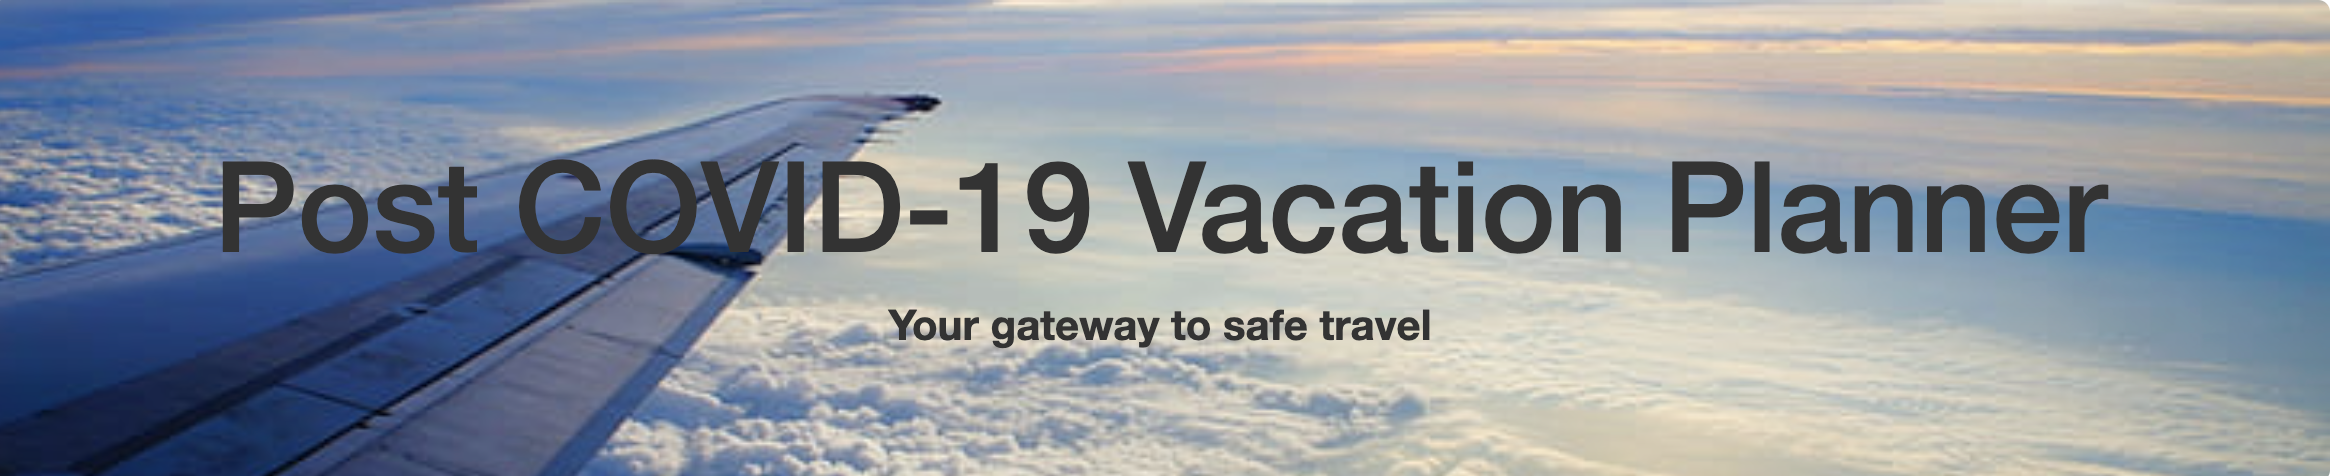

In [29]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

In [30]:
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import pandas as pd

# Data Collection : Source - https://covid.ourworldindata.org/

In [31]:
import pandas as pd

#load dataset
pcv= pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
print('Shape of data',pcv.shape)
pcv.head()
pcv

Shape of data (94867, 60)


iso_code continent  ... human_development_index excess_mortality
0          AFG      Asia  ...                   0.511              NaN
1          AFG      Asia  ...                   0.511              NaN
2          AFG      Asia  ...                   0.511              NaN
3          AFG      Asia  ...                   0.511              NaN
4          AFG      Asia  ...                   0.511              NaN
...        ...       ...  ...                     ...              ...
94862      ZWE    Africa  ...                   0.571              NaN
94863      ZWE    Africa  ...                   0.571              NaN
94864      ZWE    Africa  ...                   0.571              NaN
94865      ZWE    Africa  ...                   0.571              NaN
94866      ZWE    Africa  ...                   0.571              NaN

[94867 rows x 60 columns]

In [32]:
pd.options.display.max_seq_items = 230

# ARIMA Model process & Dependencies 

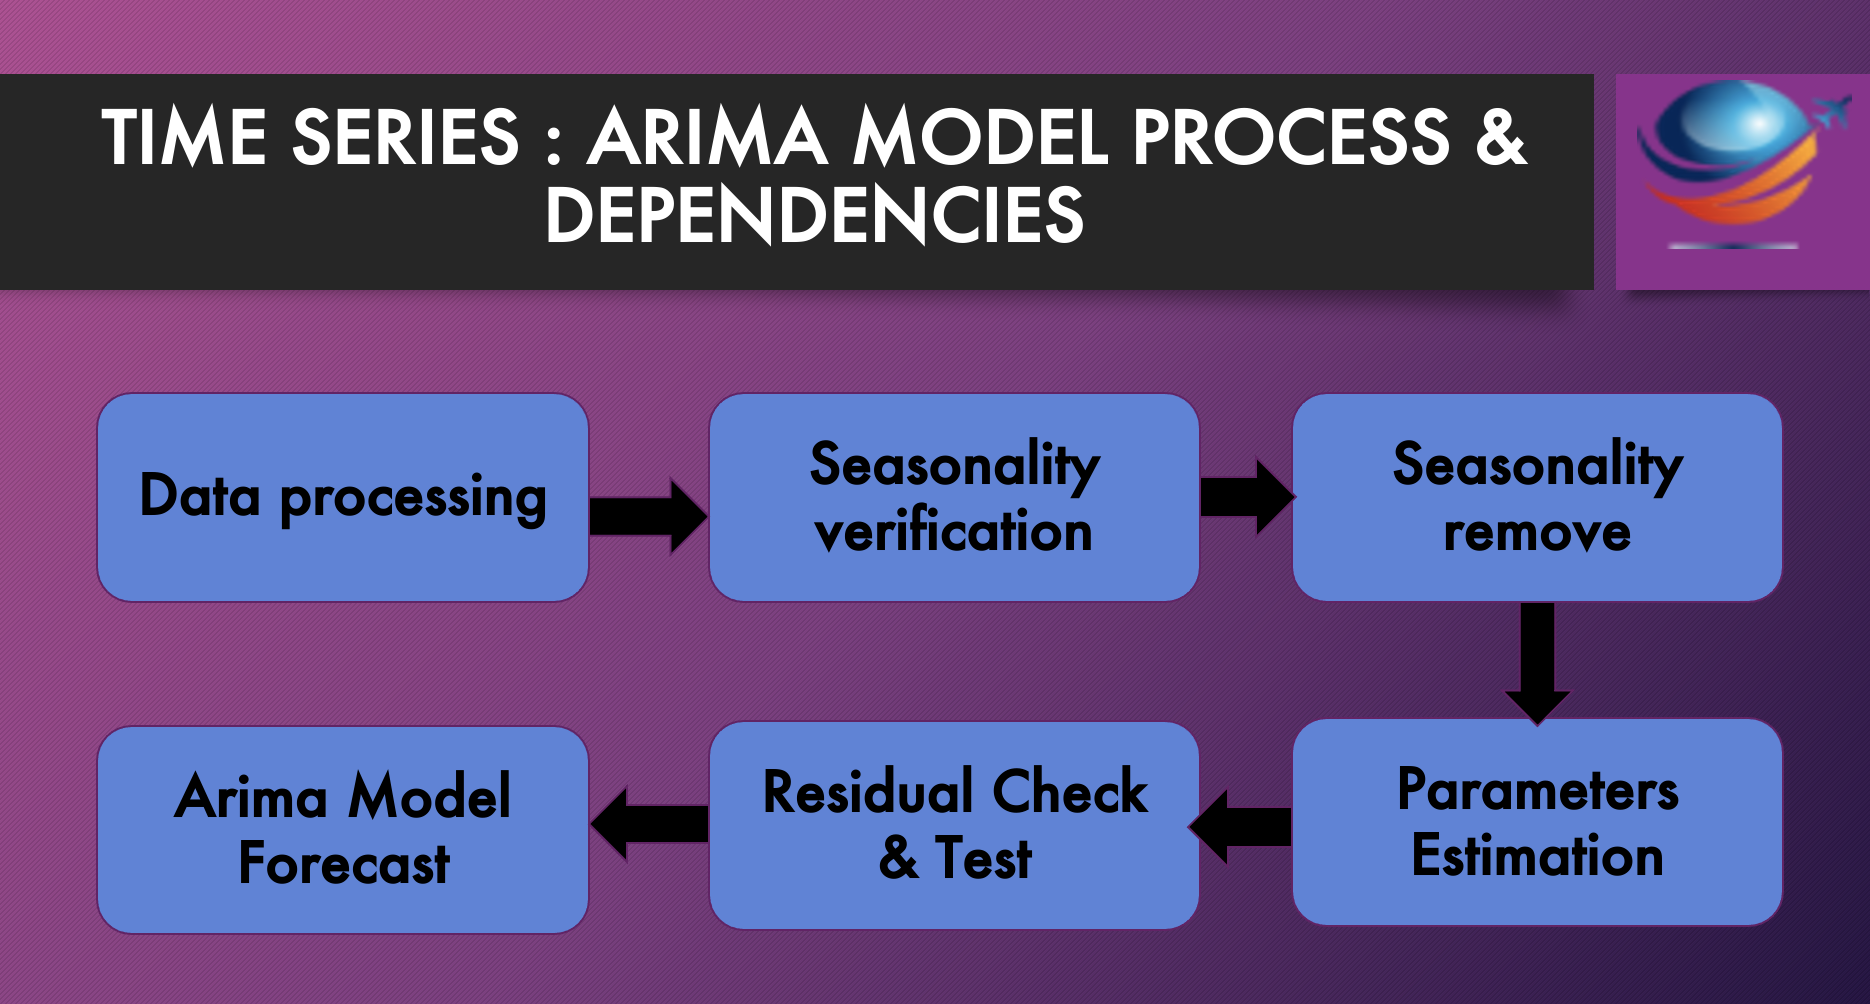

In [33]:
!pip install pmdarima 

## Import Dependencies 

In [34]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Best Model chosen is : ARIMA (p,d,q) = ARIMA(7,0,0) & Plots

### Adding Lag to stabilize different gaps between two doses

### Two order differencing for making Timeseries stationary

### Creating master data set : world_data_forecast.csv

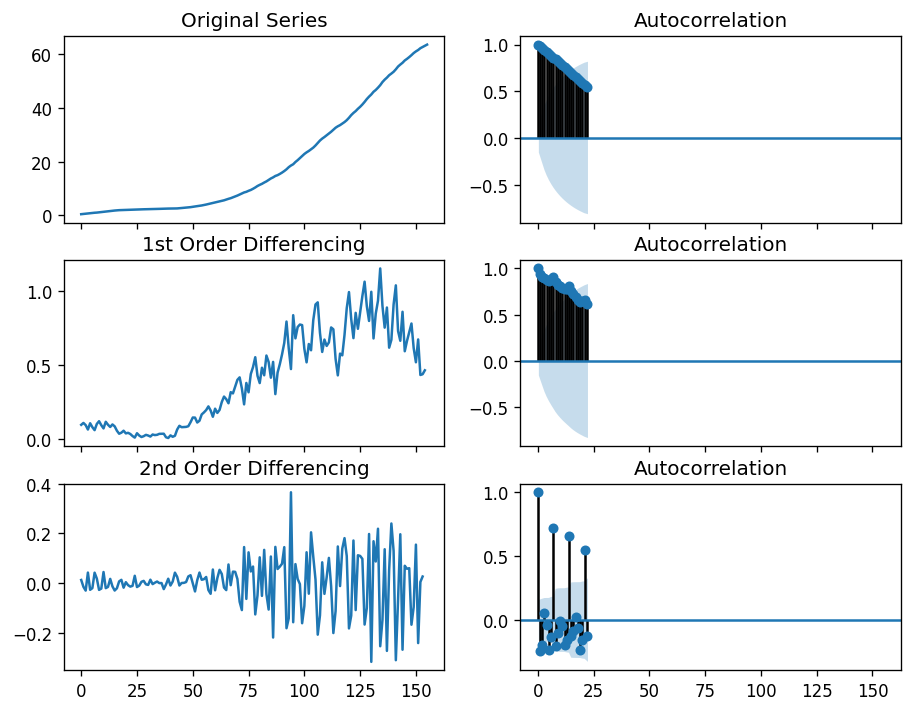

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-267.203, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-242.657, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-250.094, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-260.785, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-244.581, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-266.804, Time=0.54 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-272.481, Time=0.47 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-268.925, Time=0.19 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-272.245, Time=0.60 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-271.943, Time=0.56 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-266.964, Time=0.33 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-290.123, Time=0.67 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-297.257, Time=0.74 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-270.176, Time=0.61 sec
 ARIMA(4,2,3)(0,0,0)[0] intercept

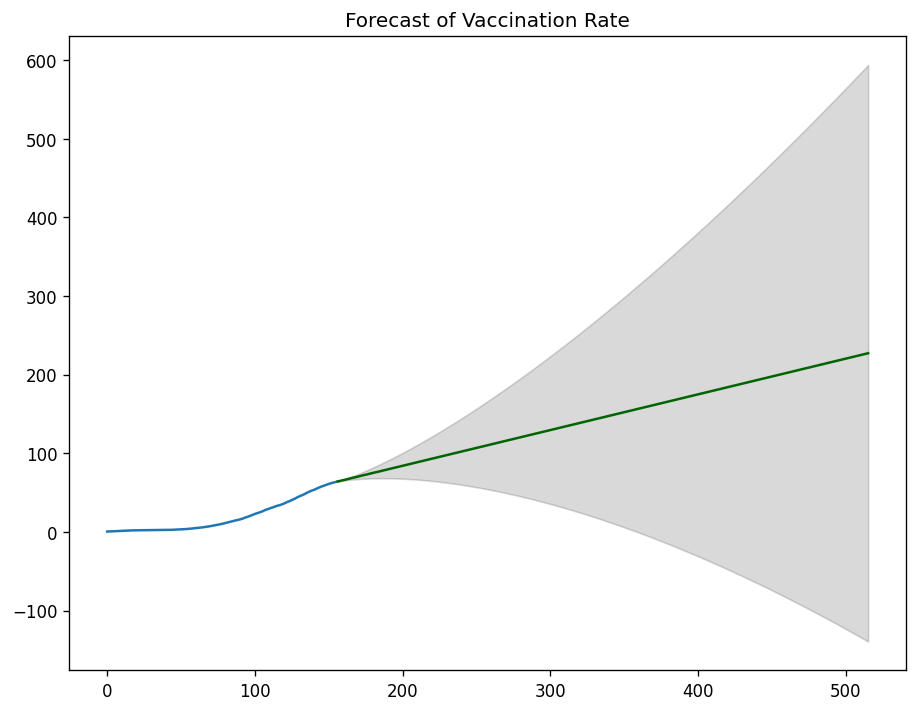

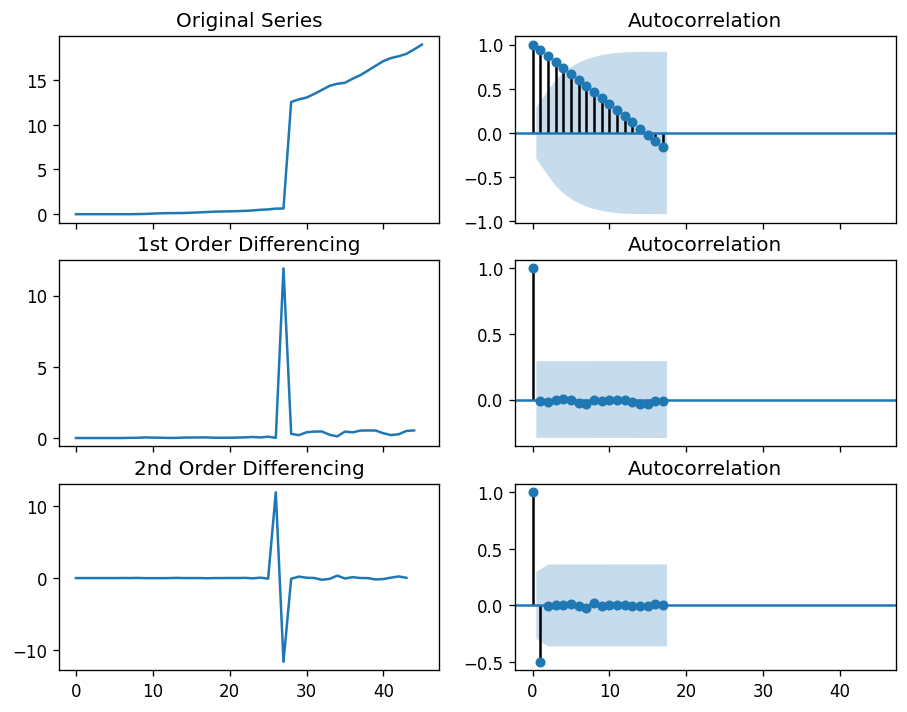

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=209.716, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=199.401, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=207.717, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=196.211, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=195.343, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=195.618, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=193.350, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=194.216, Time=0.02 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=193.628, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=188.423, Time=0.13 sec
 A

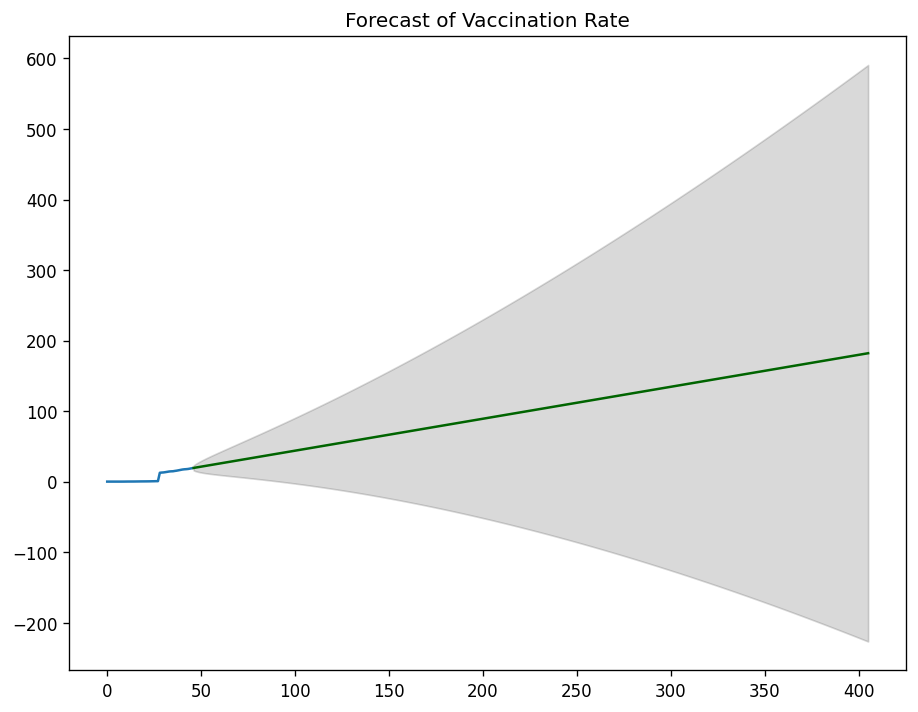

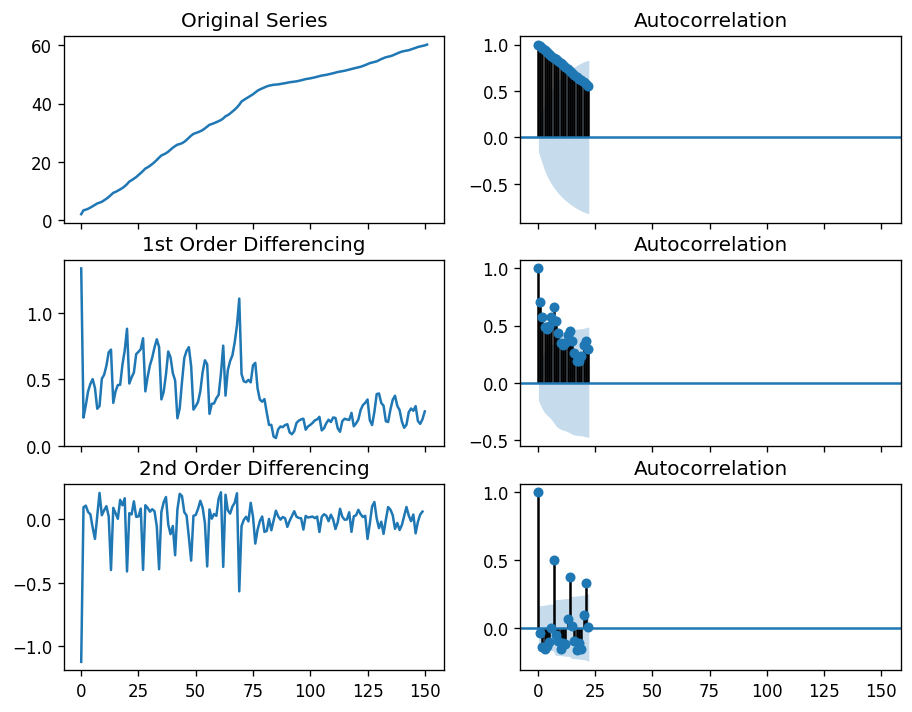

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-128.831, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-127.192, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-127.543, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-130.512, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.839 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  152
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  66.256
Date:                Fri, 11 Jun 2021   AIC                           -130.512
Time:                        13:15:57   BIC                           -127.501
Sample:                             0   HQIC                          -129.289
                                - 152                                         
Co

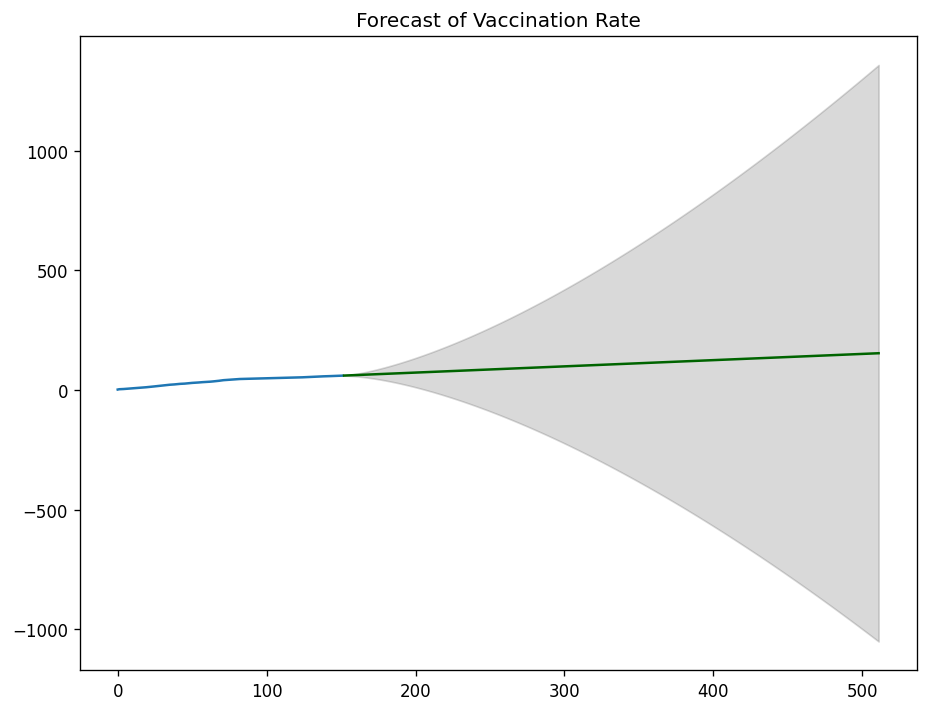

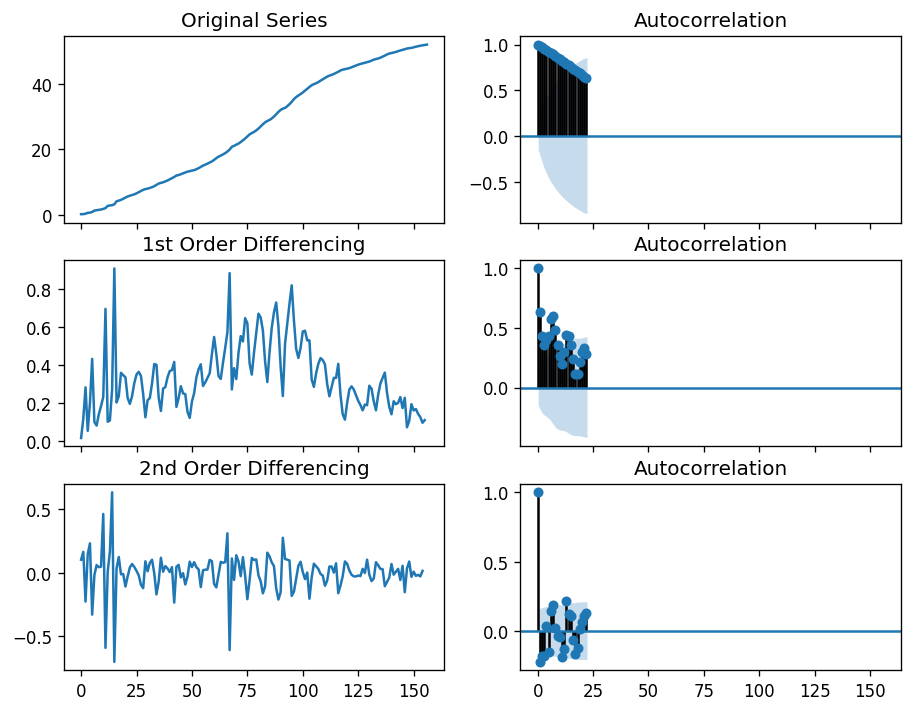

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-194.226, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-154.598, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-160.310, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-185.083, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-156.596, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-194.850, Time=0.30 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-196.773, Time=0.18 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-195.025, Time=0.36 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-196.417, Time=0.54 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-198.766, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-187.080, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-196.843, Time=0.16 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-197.018, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : 

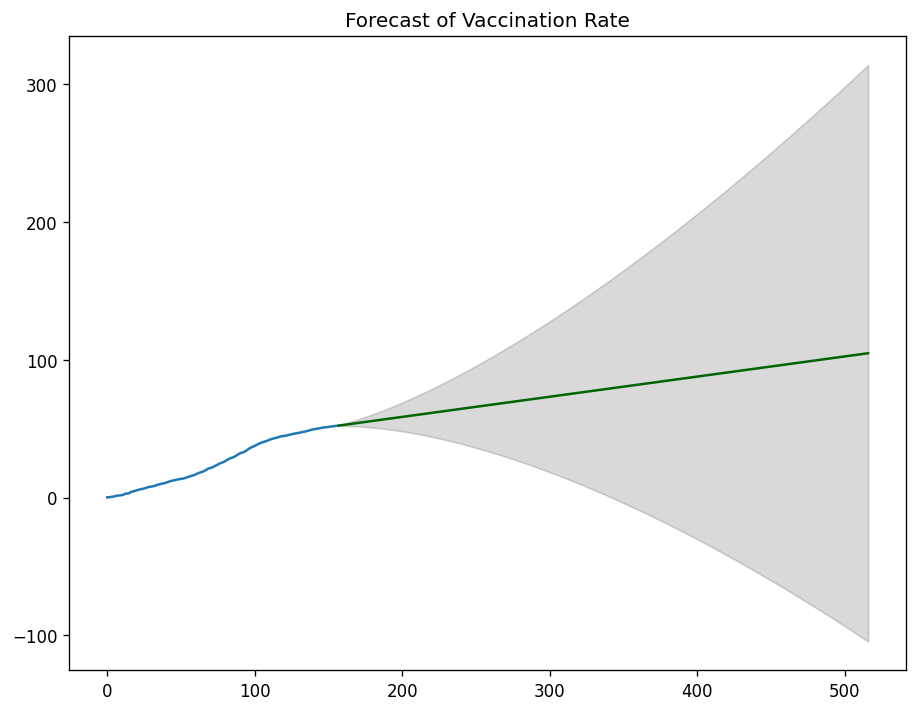

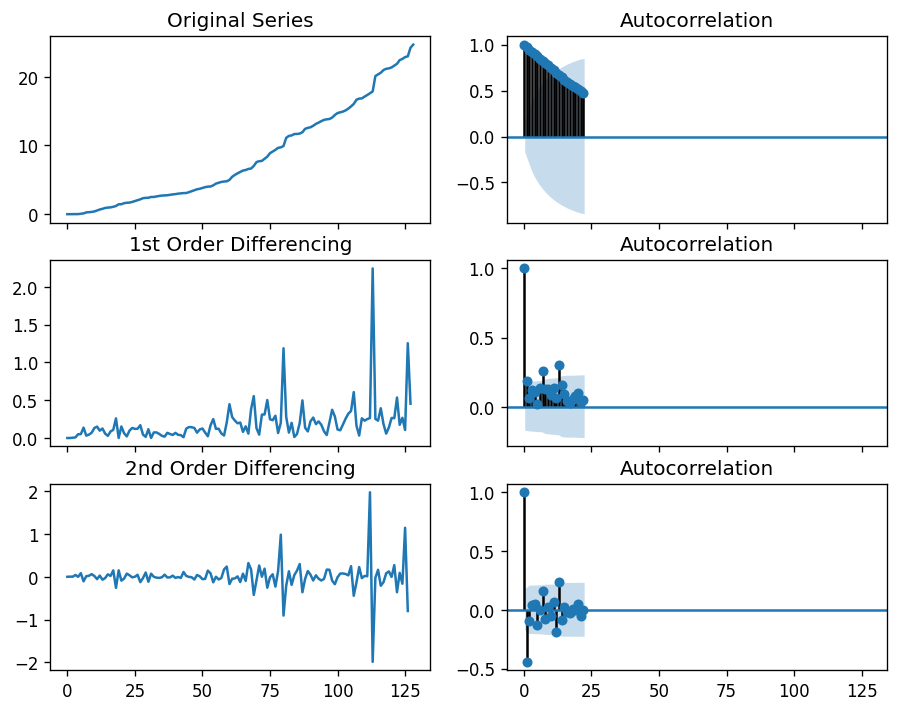

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11.244, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20.326, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17.913, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18.170, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=75.104, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14.673, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13.056, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=20.060, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=19.748, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10.883, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=54.638, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=44.470, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=12.743, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12.710, Time=0.28 sec


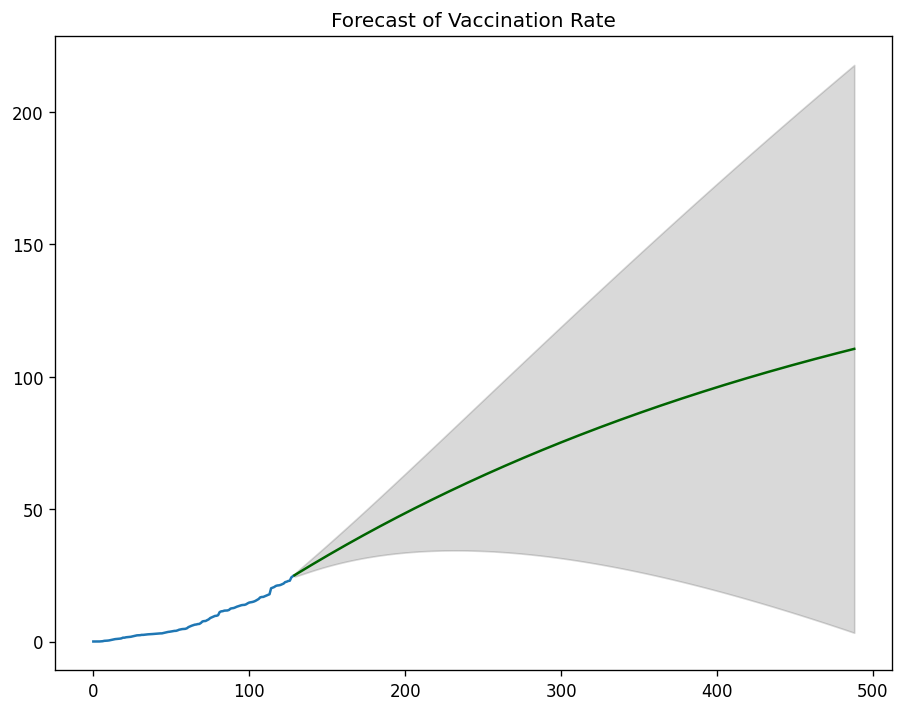

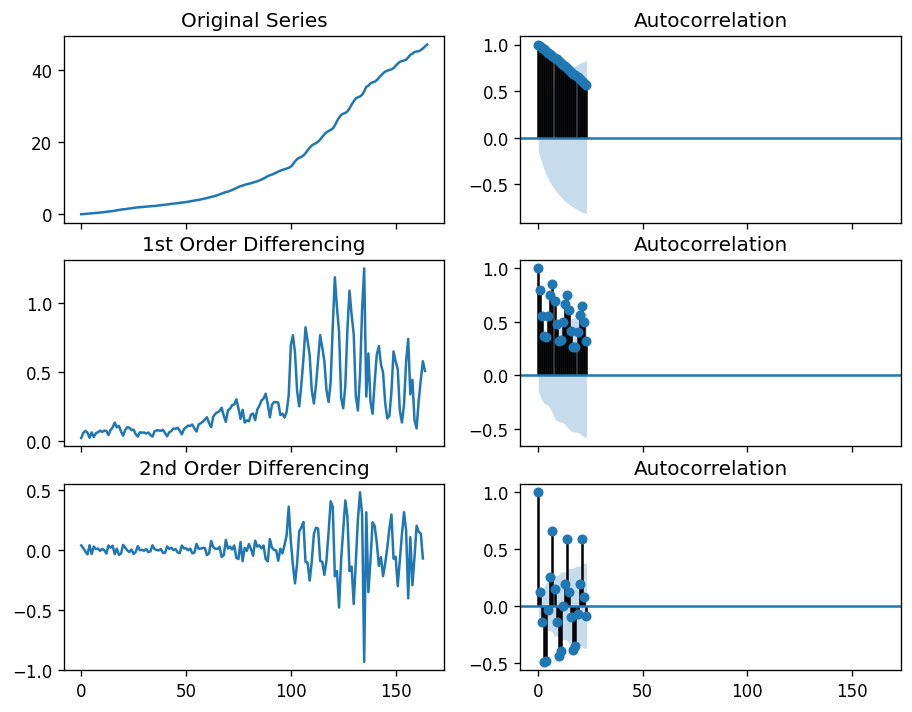

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-127.377, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-128.185, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-128.809, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-129.351, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-130.129, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.538 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  166
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  66.065
Date:                Fri, 11 Jun 2021   AIC                           -130.129
Time:                        13:16:09   BIC                           -127.029
Sample:                             0   HQIC                          -128.871
                                - 166                                       

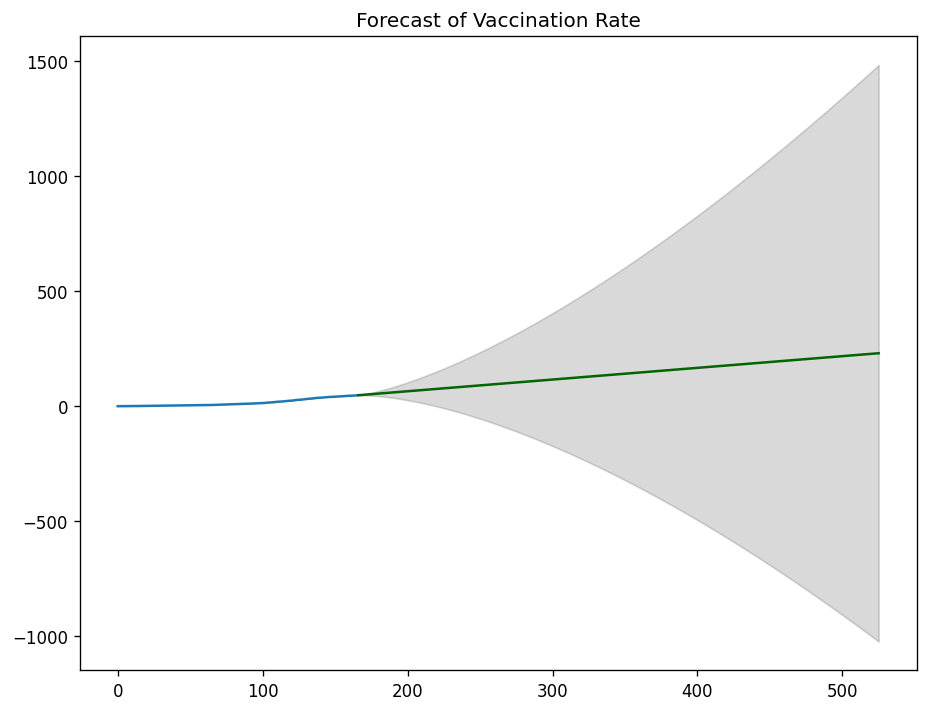

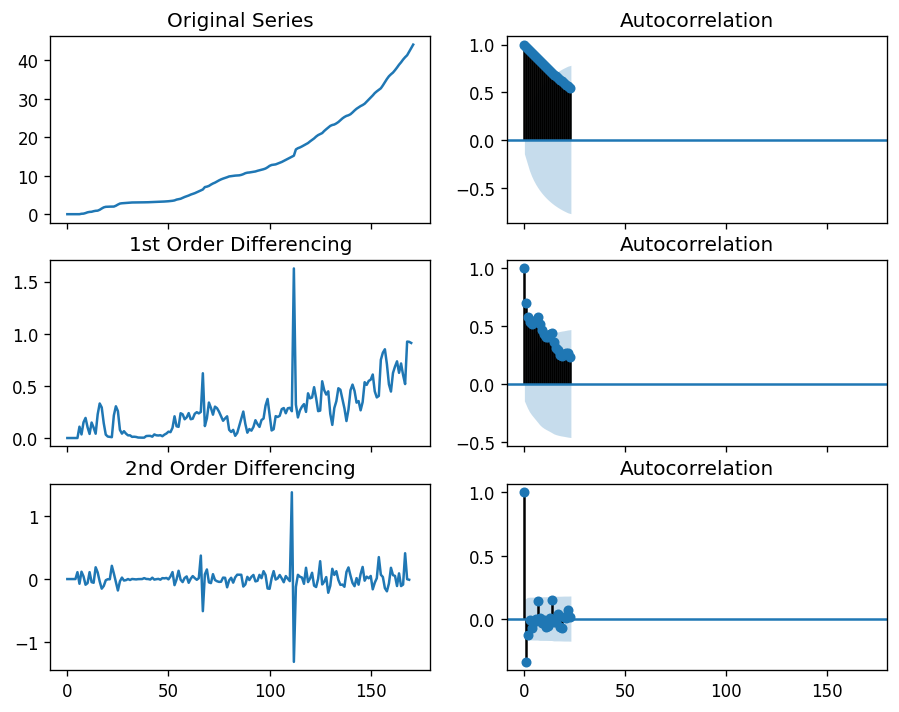

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-157.016, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-101.124, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-119.557, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-152.840, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-102.969, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-156.152, Time=0.43 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-155.741, Time=0.42 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-157.726, Time=0.44 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-155.750, Time=0.49 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-158.735, Time=0.65 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-152.534, Time=0.71 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=-154.531, Time=0.70 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-153.632, Time=0.31 sec
 ARIMA(2,2,4)(0,0,0)[0] intercept   : 

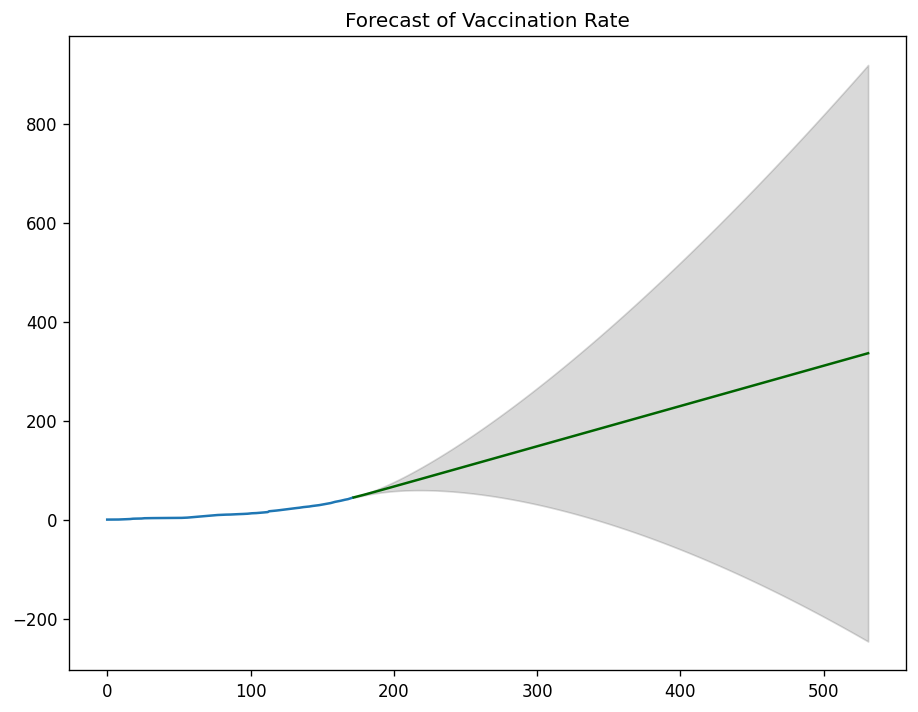

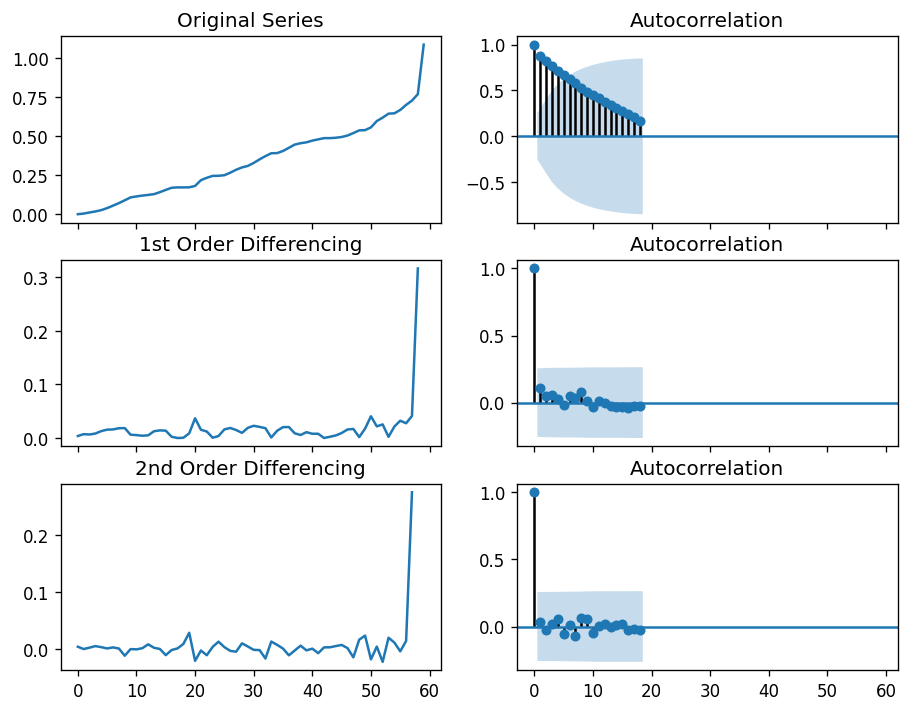

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-210.476, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-213.555, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-212.198, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-212.462, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-214.341, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.506 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 108.171
Date:                Fri, 11 Jun 2021   AIC                           -214.341
Time:                        13:16:23   BIC                           -212.281
Sample:                             0   HQIC                          -213.539
                                 - 60                                       

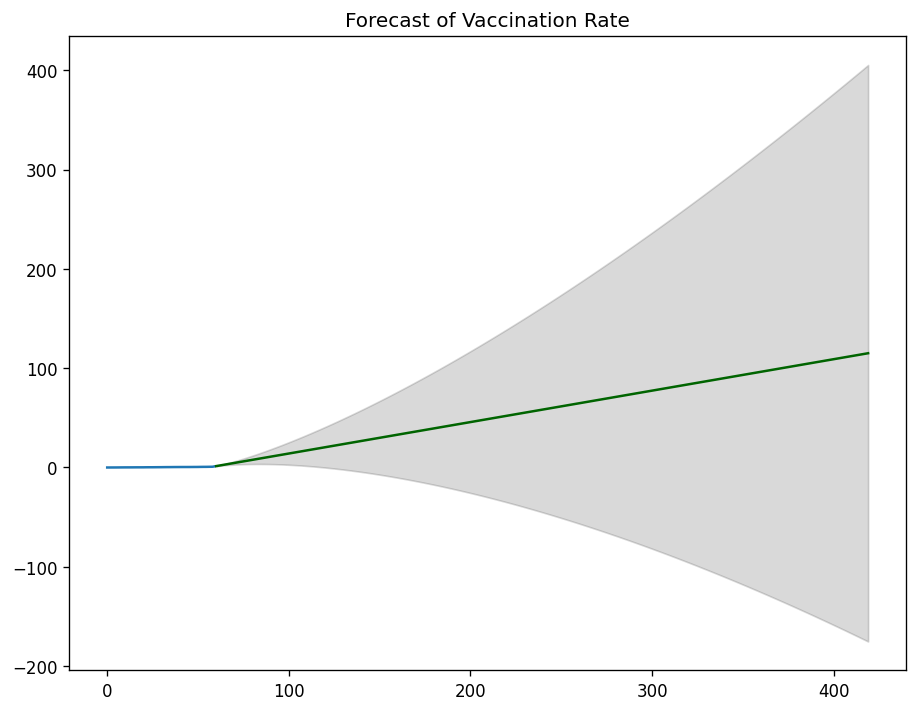

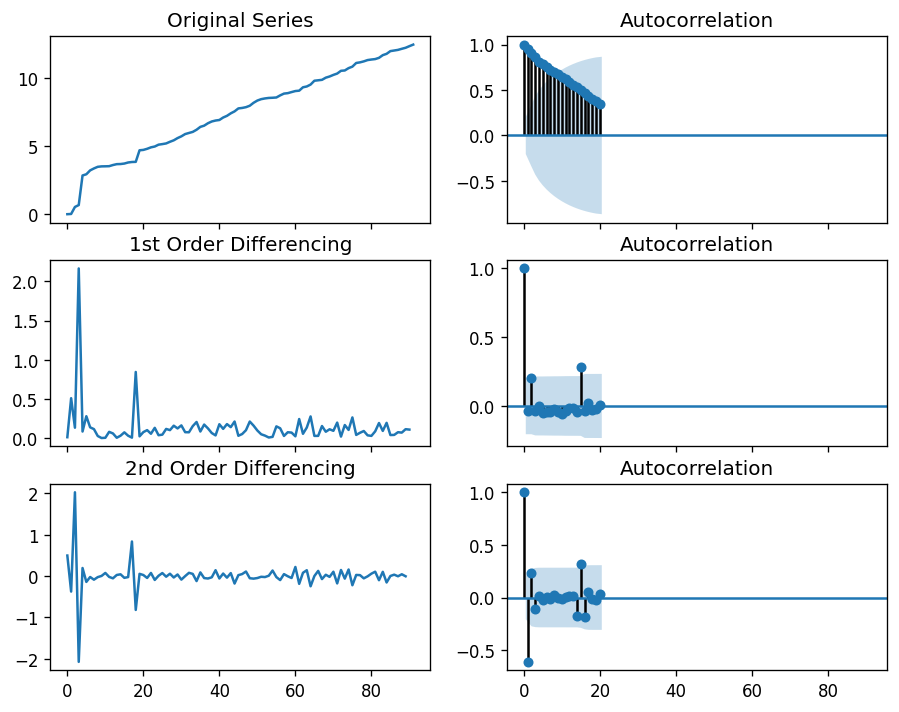

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5.043, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2.839, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4.736, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4.766, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26.174, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.480 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   92
Model:               SARIMAX(0, 1, 0)   Log Likelihood                   0.580
Date:                Fri, 11 Jun 2021   AIC                              2.839
Time:                        13:16:25   BIC                              7.861
Sample:                             0   HQIC                             4.865
                                 - 92                                         
Covariance 

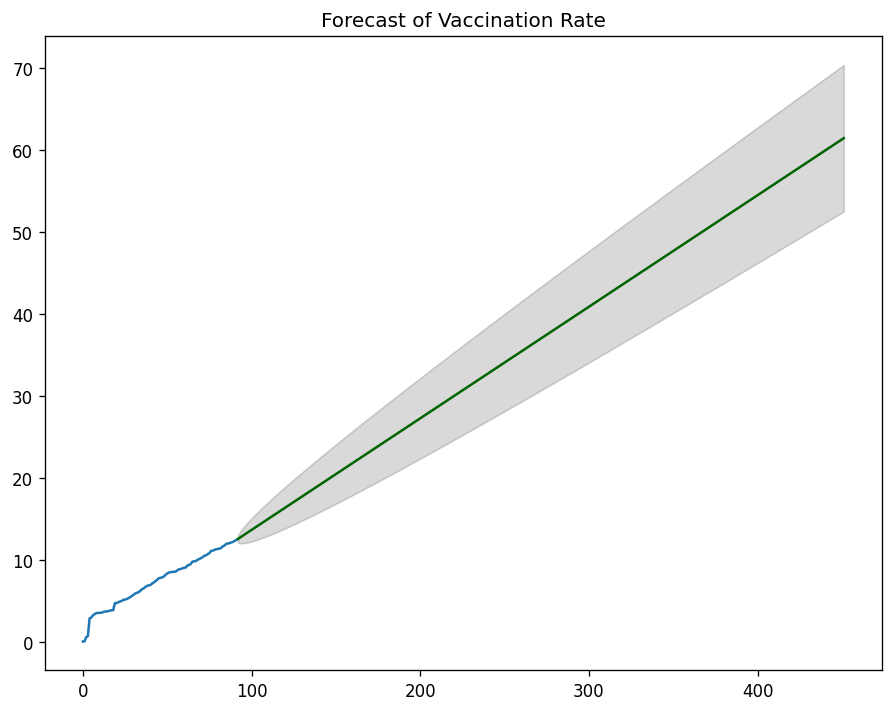

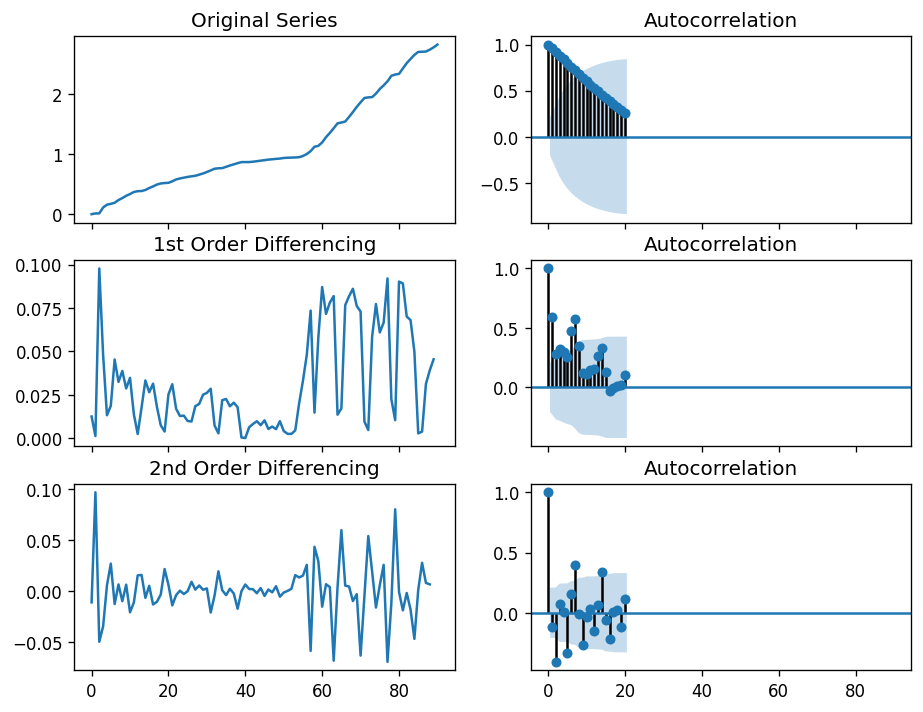

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-414.350, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-397.281, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-396.555, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-405.950, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-399.262, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-419.114, Time=0.45 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-415.802, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-414.026, Time=0.41 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-421.024, Time=0.44 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-421.235, Time=0.30 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-423.147, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-420.661, Time=0.20 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-420.167, Time=0.56 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-425.263, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0]          

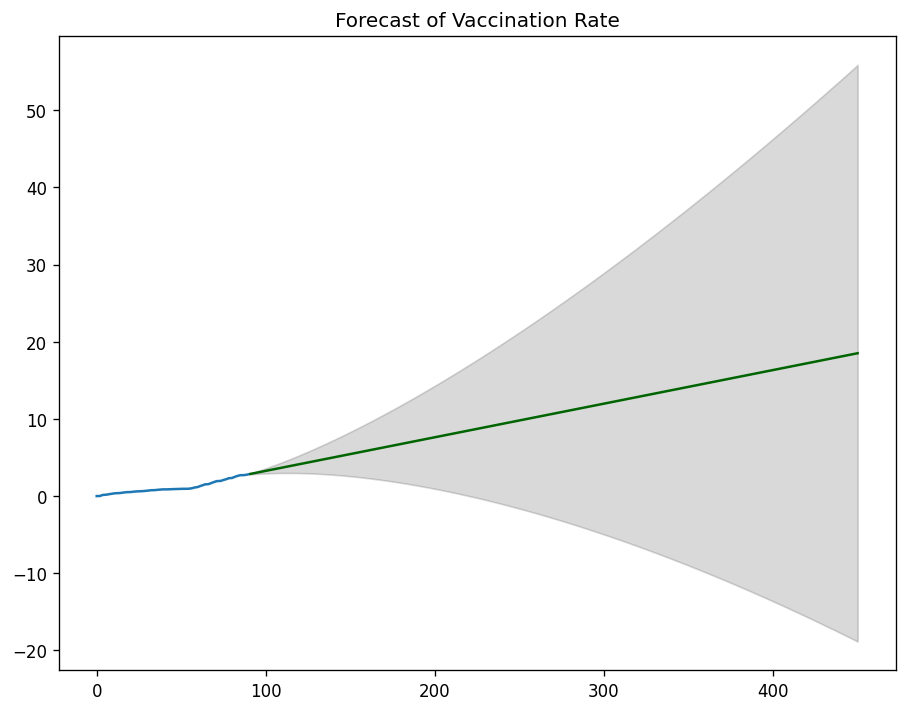

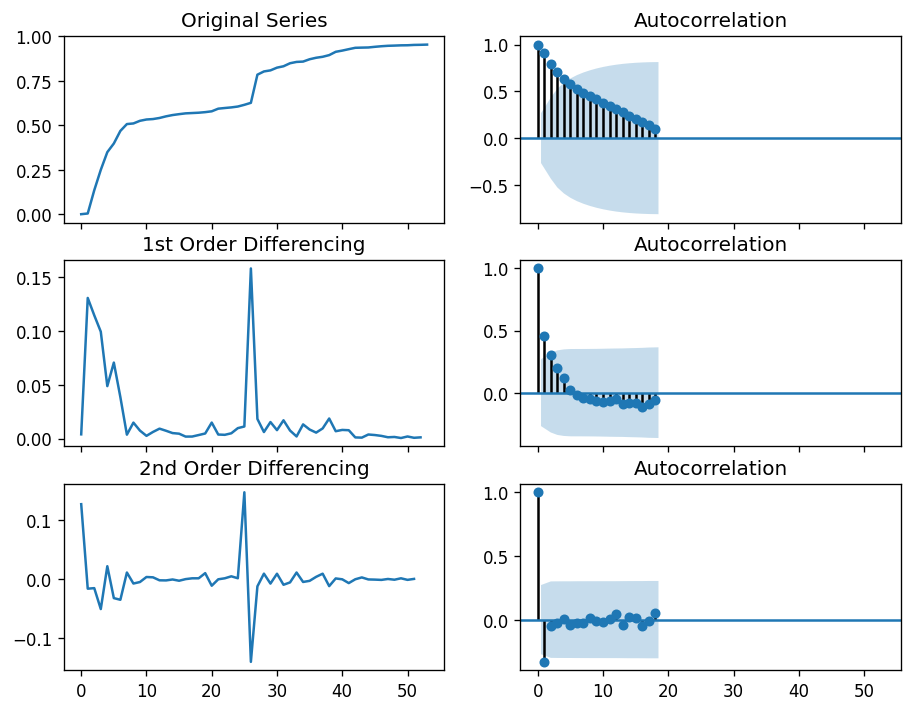

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-214.400, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-205.323, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-215.584, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-212.544, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-193.970, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-214.341, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-212.426, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-213.351, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.024 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 110.792
Date:                Fri, 11 Jun 2021   AIC                           -215.584
Time:                        13:16:3

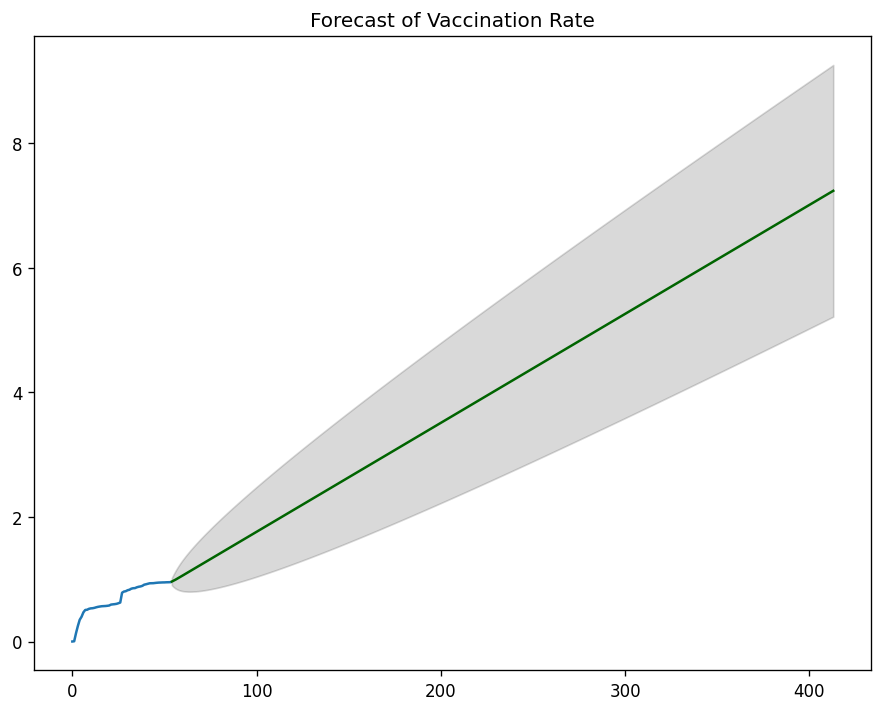

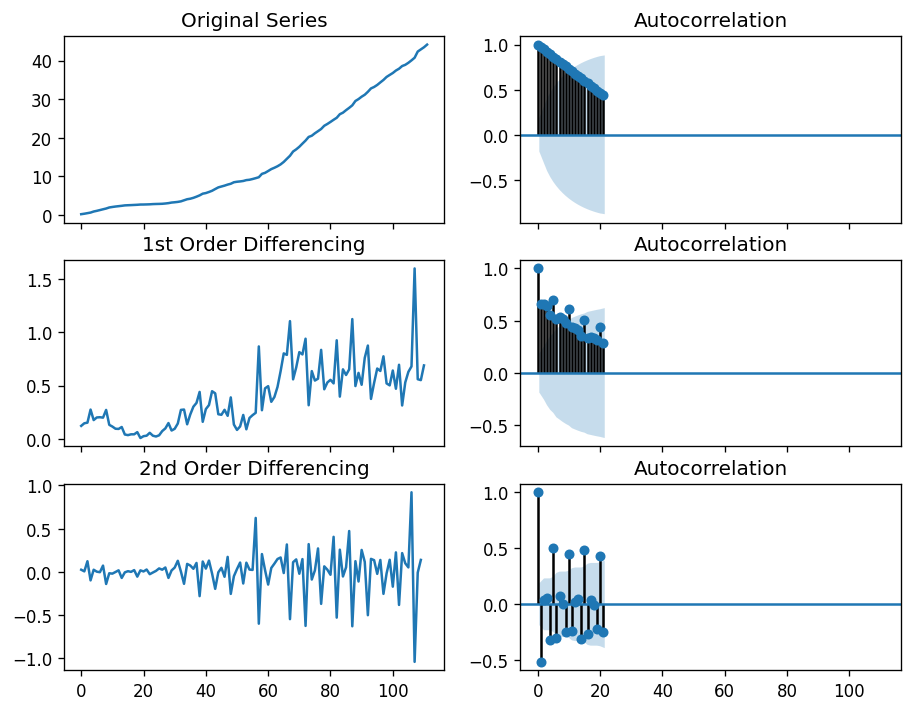

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-47.923, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2.515, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-29.004, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-49.750, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=0.565, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-47.919, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-50.339, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-48.639, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-48.642, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-30.875, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.468 seconds
                               SARIMAX Results                                
Dep. Variable:                   

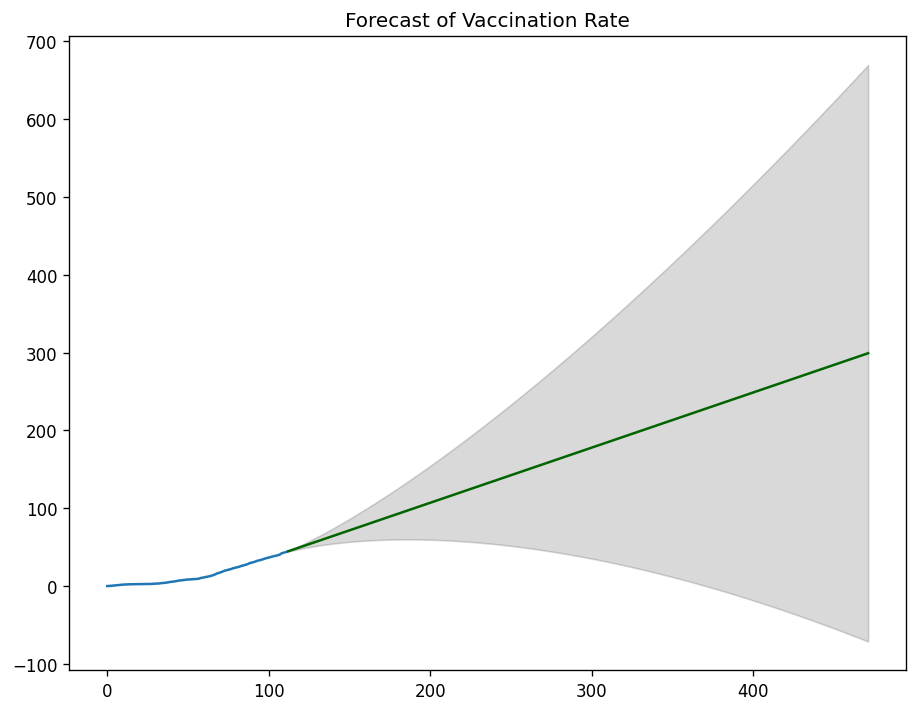

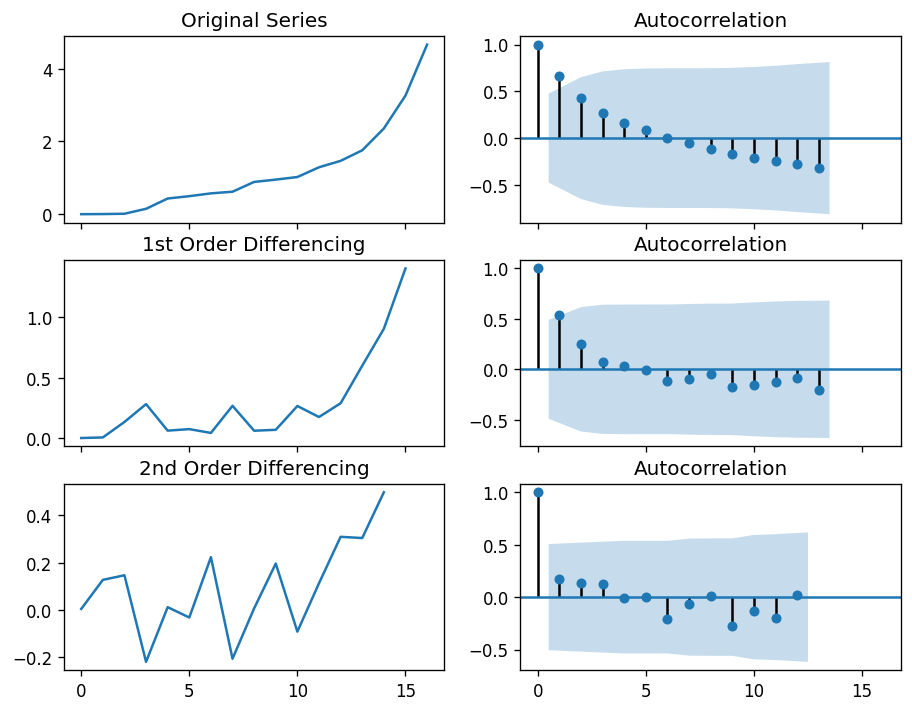

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-0.217, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-3.172, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1.757, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-1.611, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1.953, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.309 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:               SARIMAX(0, 2, 0)   Log Likelihood                   3.586
Date:                Fri, 11 Jun 2021   AIC                             -3.172
Time:                        13:16:39   BIC                             -1.756
Sample:                             0   HQIC                            -3.187
                                 - 17                                         
Covaria

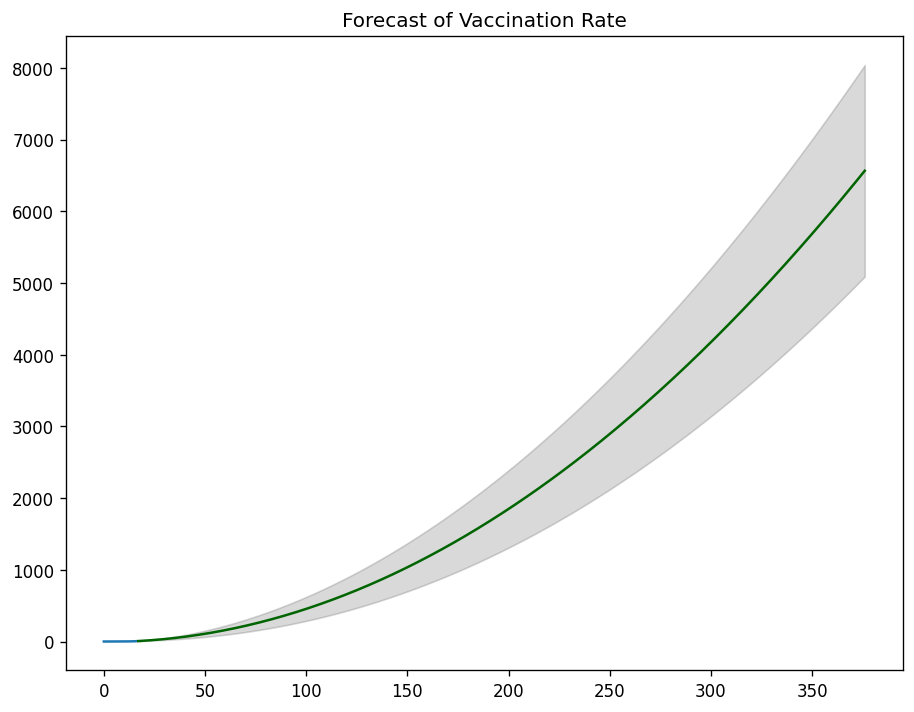

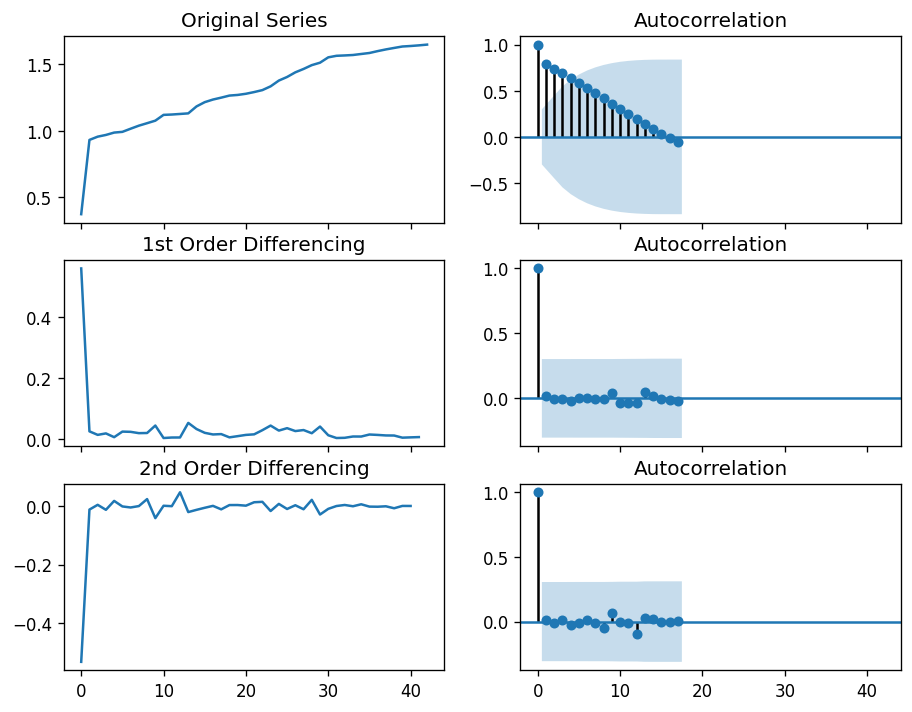

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-85.553, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-83.868, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-84.133, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-82.325, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.822 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  44.776
Date:                Fri, 11 Jun 2021   AIC                            -85.553
Time:                        13:16:42   BIC                            -82.078
Sample:                             0   HQIC                           -84.279
                                 - 43                                         
Covari

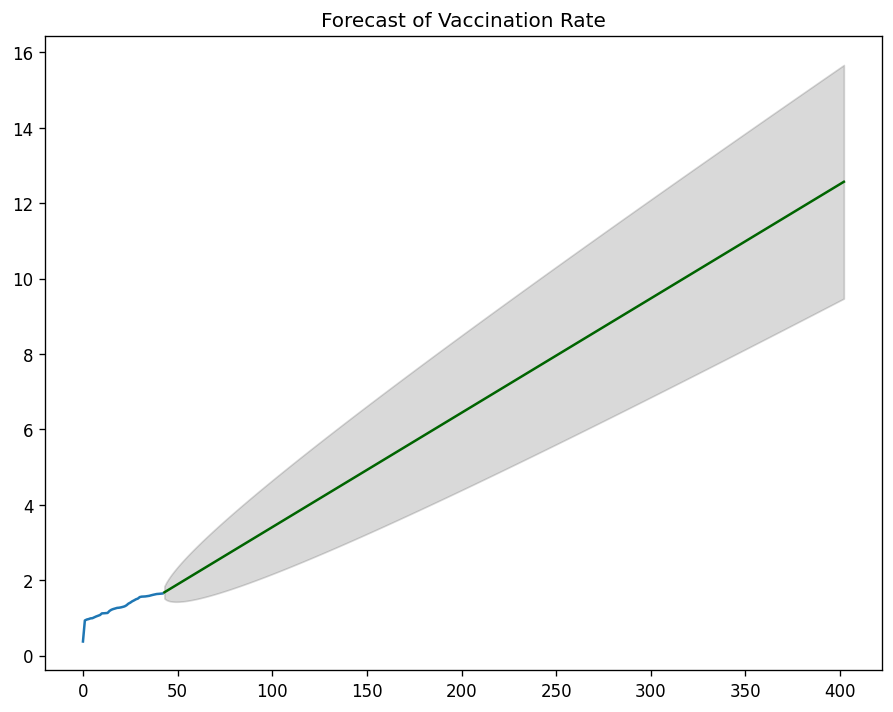

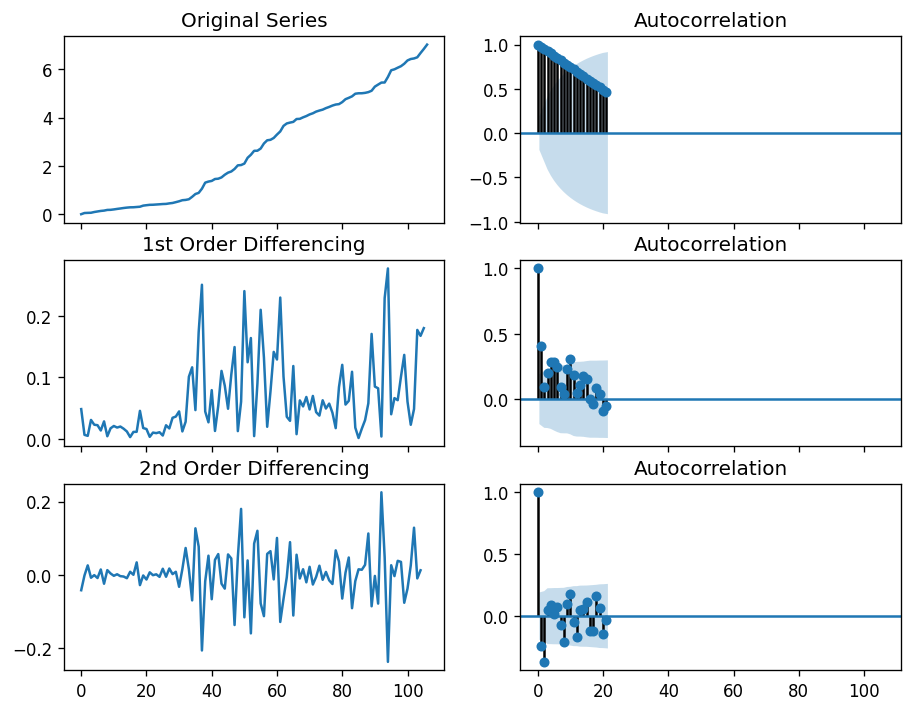

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-297.806, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-261.887, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-266.172, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-295.205, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-263.851, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-303.113, Time=0.28 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-288.095, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-301.311, Time=0.44 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-301.301, Time=0.32 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-301.247, Time=0.37 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-293.211, Time=0.19 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-299.327, Time=0.37 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-304.107, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-298.231, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0]          

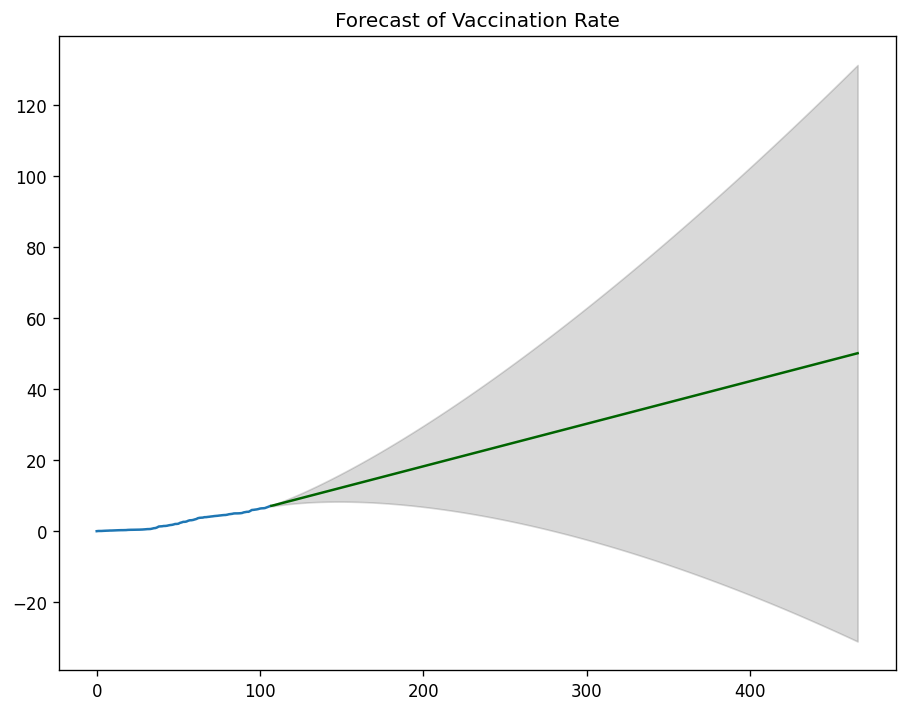

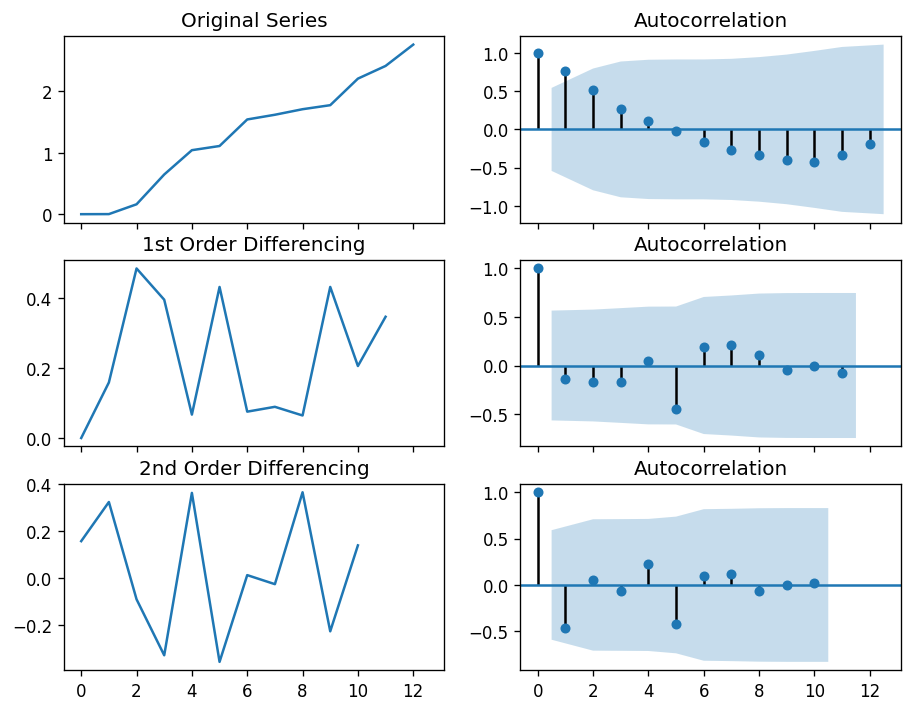

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4.882, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4.248, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3.051, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.492 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  -0.526
Date:                Fri, 11 Jun 2021   AIC                              3.051
Time:                        13:16:49   BIC                              3.449
Sample:                             0   HQIC                             2.800
                                 - 13                                         
Covariance Type:

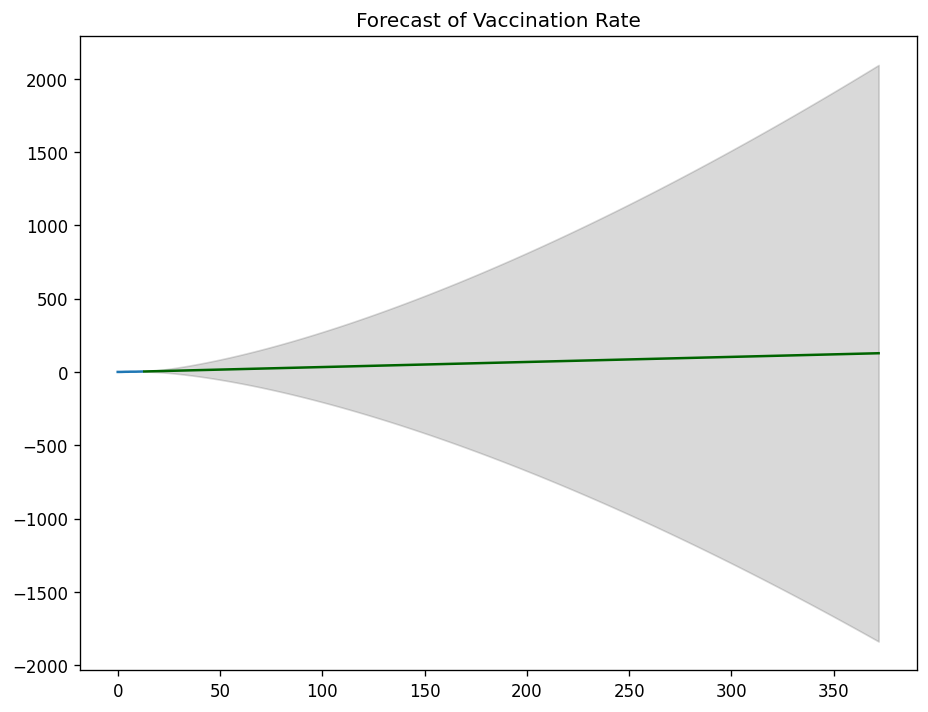

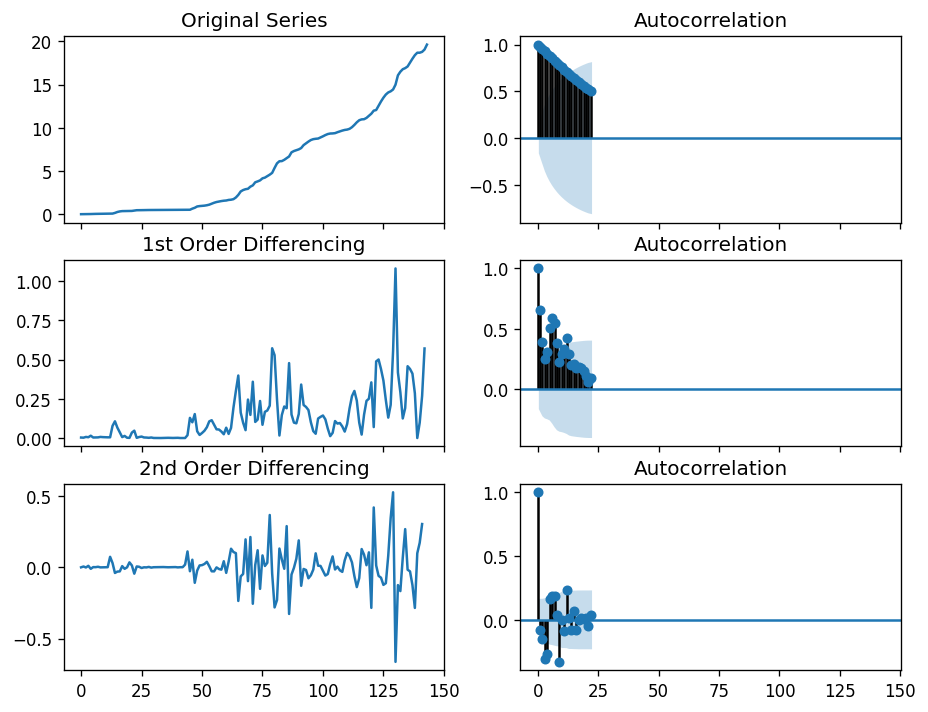

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-167.255, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-166.141, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-166.850, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-169.125, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.675 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  85.563
Date:                Fri, 11 Jun 2021   AIC                           -169.125
Time:                        13:16:52   BIC                           -166.169
Sample:                             0   HQIC                          -167.924
                                - 144                                         
Co

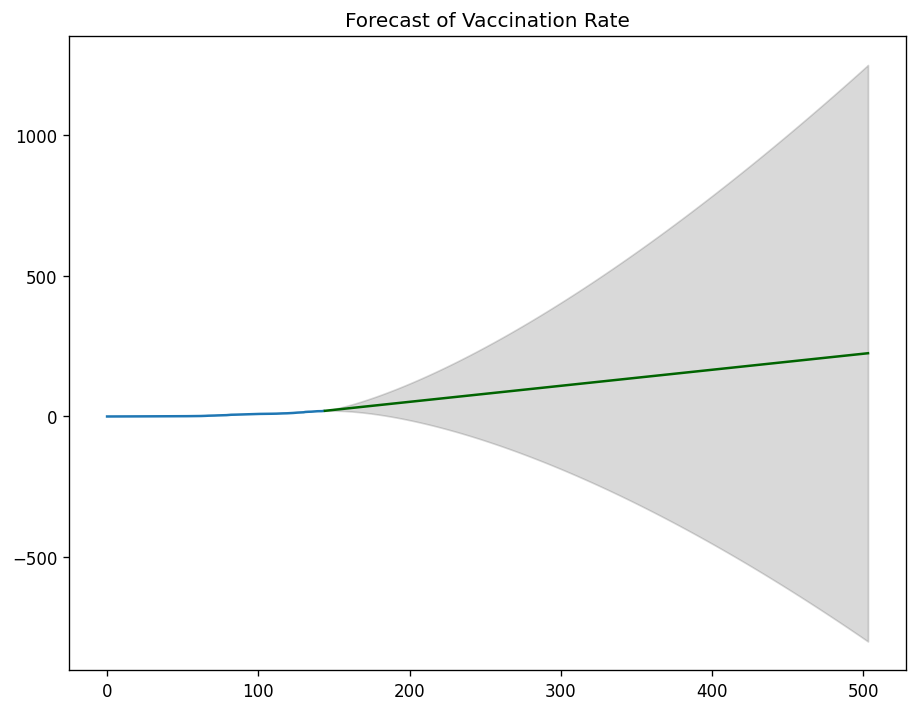

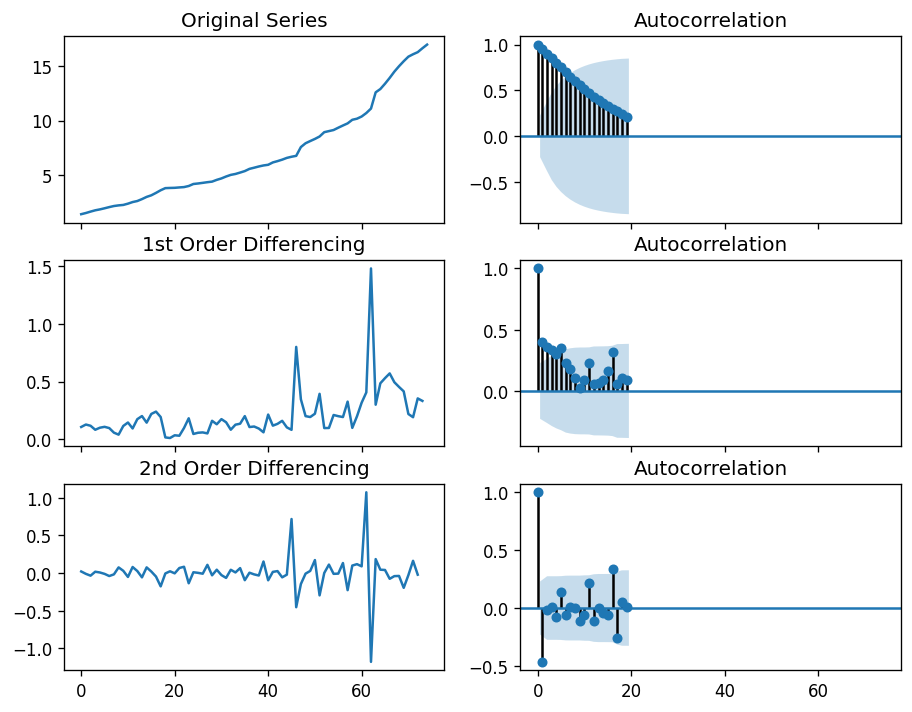

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-4.669, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-20.206, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-34.615, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-6.655, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-31.328, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-35.580, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-34.055, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-33.984, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-22.170, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-31.957, Time=0.19 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.608 seconds
                               SARIMAX Results                                
Dep. Variable:                 

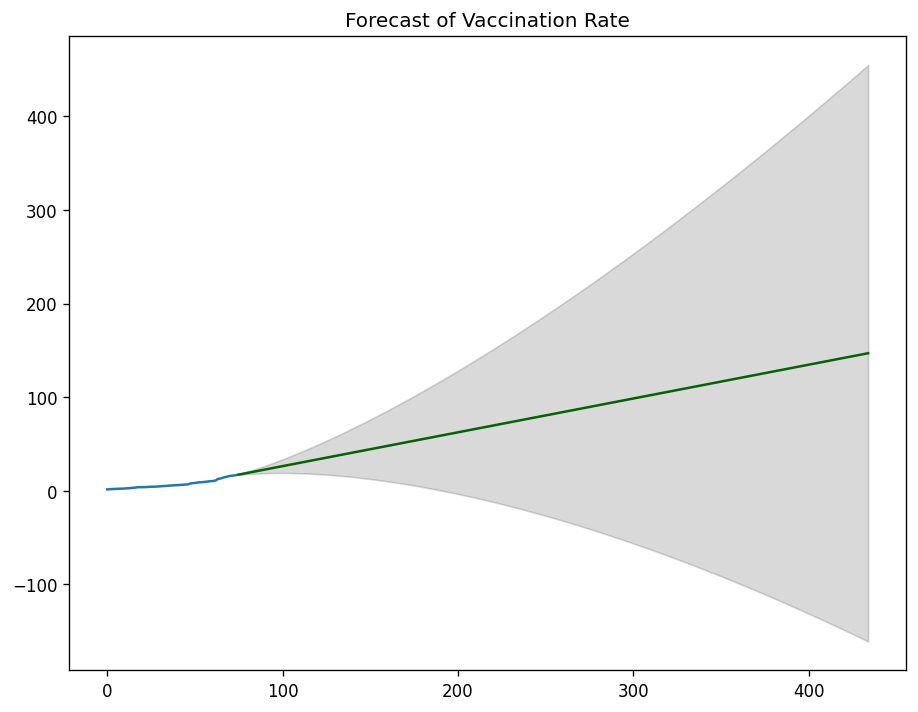

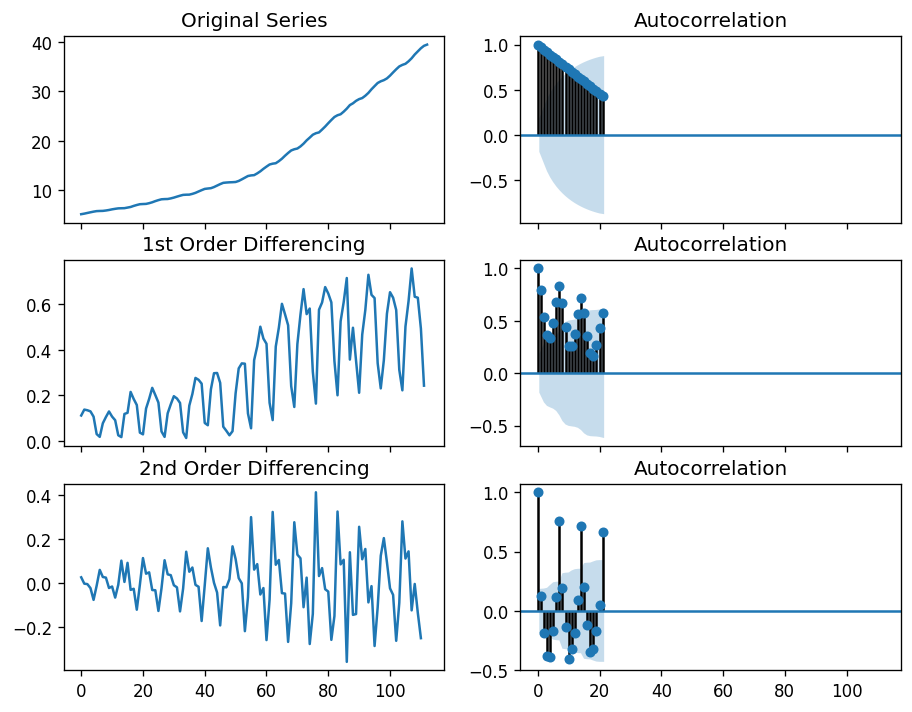

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-138.108, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-23.594, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-133.213, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-106.090, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=99.046, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-136.715, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-144.117, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-133.291, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-136.059, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-150.867, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-146.826, Time=0.64 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-151.719, Time=0.57 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-152

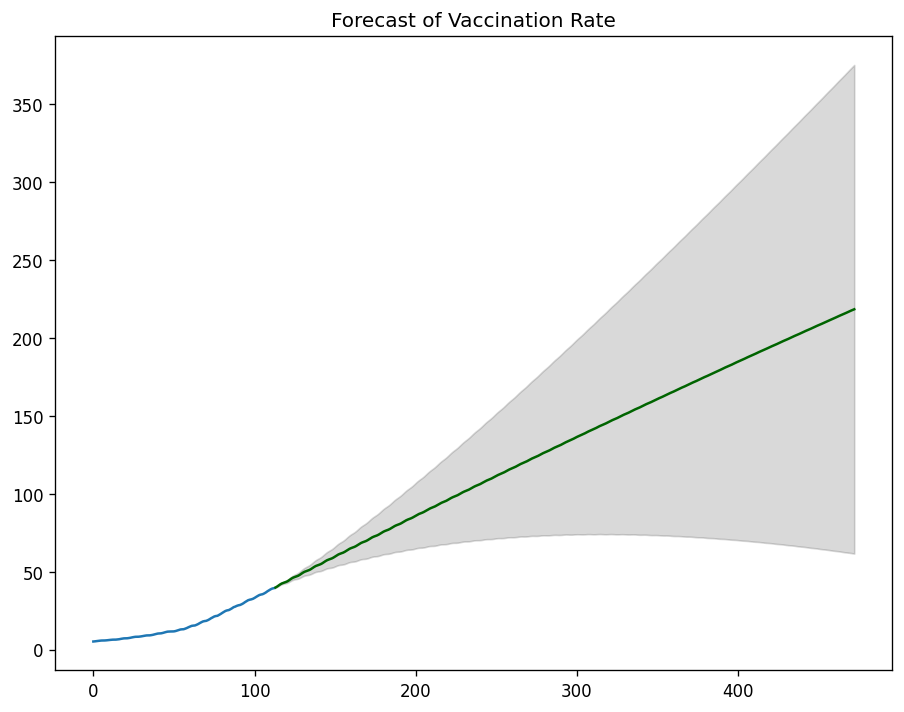

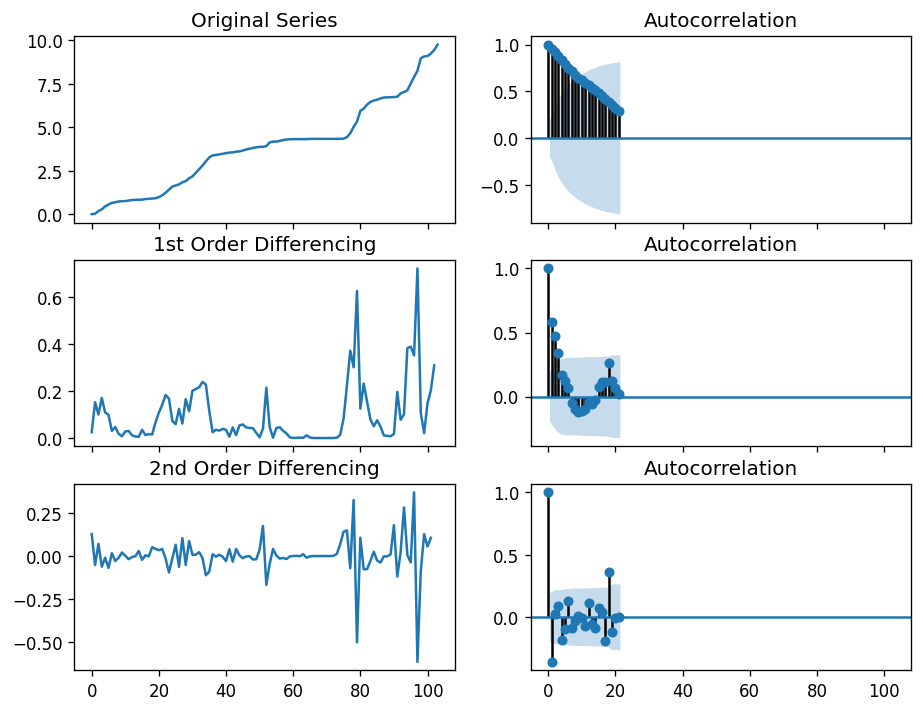

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-176.120, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-132.357, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-174.665, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-158.027, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-87.506, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-174.859, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-176.247, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-166.078, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-174.842, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-178.253, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-180.010, Time=0.24 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-178.343, Time=0.28 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-176.562, Time=0.52 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-166.788, Time=0.16 sec

Best model:  ARIMA(0,1,3)(0,0,0)[

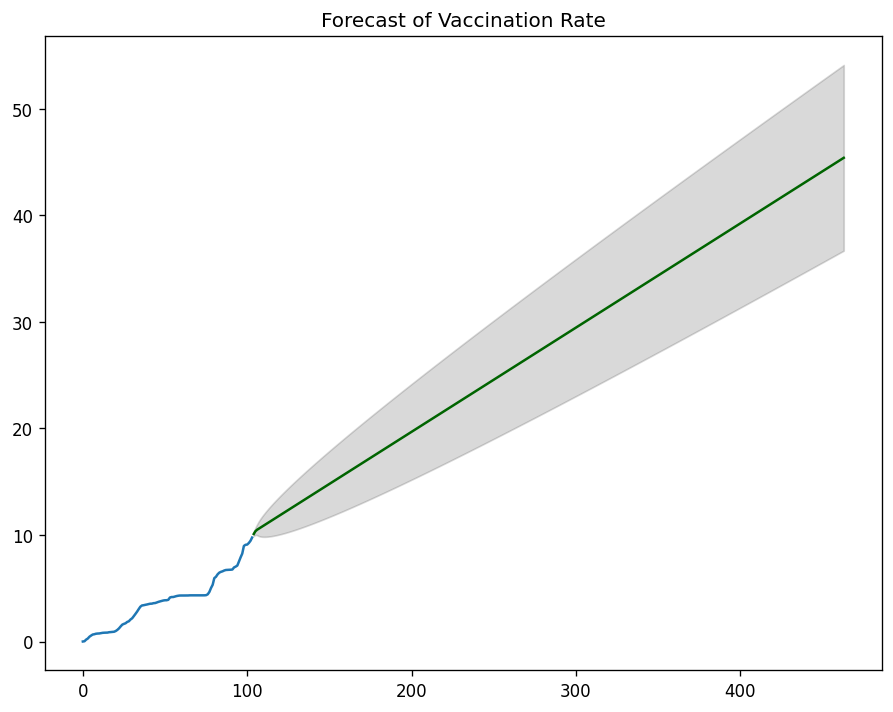

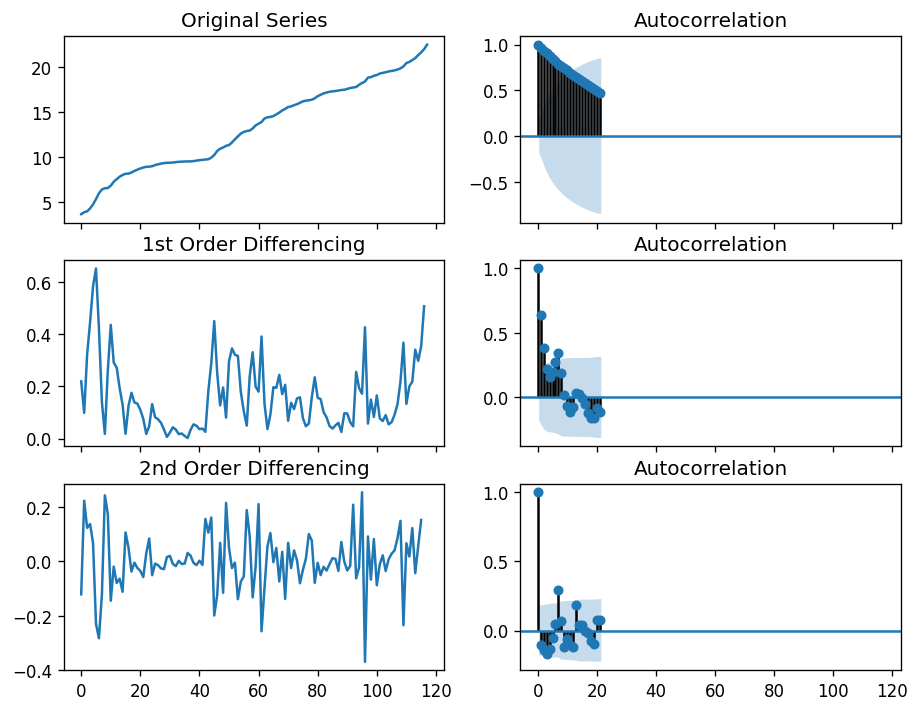

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-195.954, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-185.683, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-184.954, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-185.719, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-187.620, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-196.927, Time=0.31 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-185.862, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-198.290, Time=0.45 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-189.570, Time=0.17 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-199.623, Time=0.53 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-195.084, Time=0.36 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-200.931, Time=0.74 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-201.122, Time=0.41 sec
 ARIMA(6,2,0)(0,0,0)[0] intercept   : AIC=-204.279, Time=0.87 sec
 ARIMA(7,2,0)(0,0,0)[0] intercept

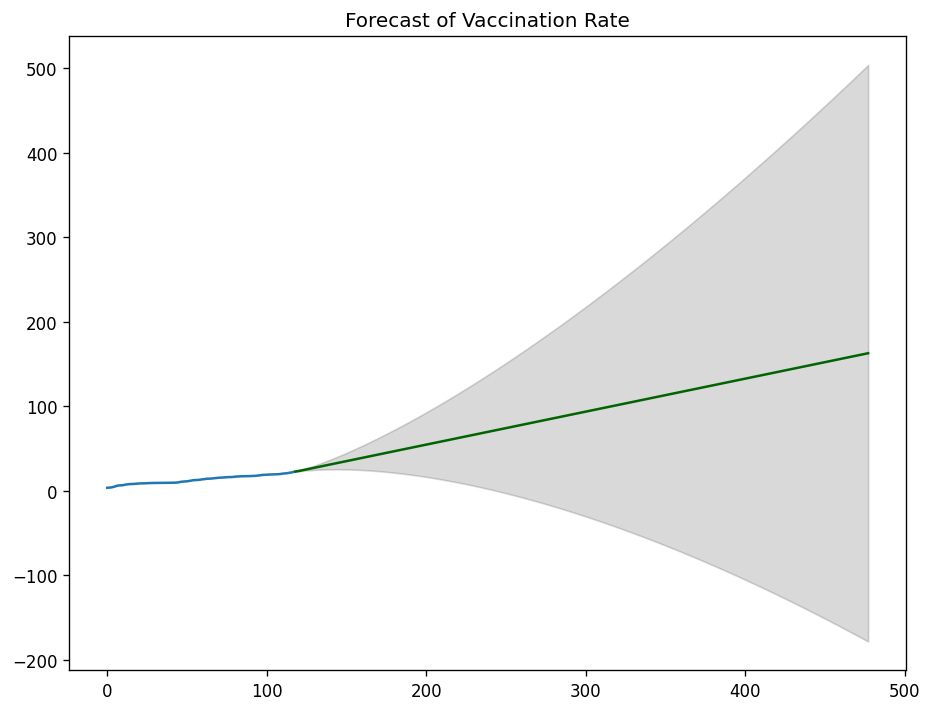

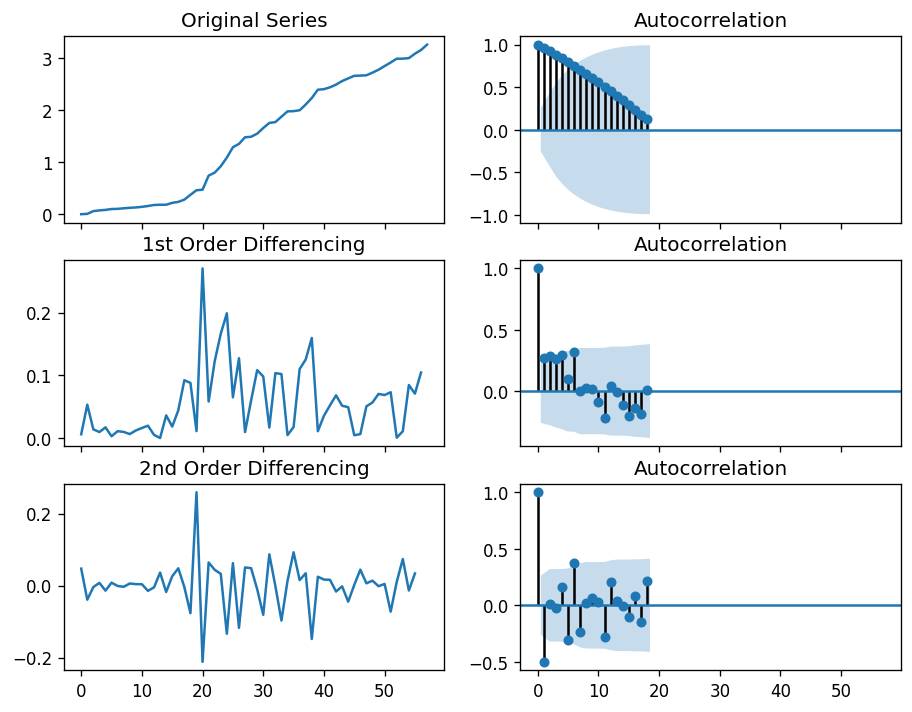

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-162.881, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-140.537, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-154.617, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-164.726, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-142.498, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-162.899, Time=0.24 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-160.859, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-166.473, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-164.652, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-164.676, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-156.554, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-164.039, Time=0.25 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.387 seconds
                               SARIMAX Results                                
Dep. Vari

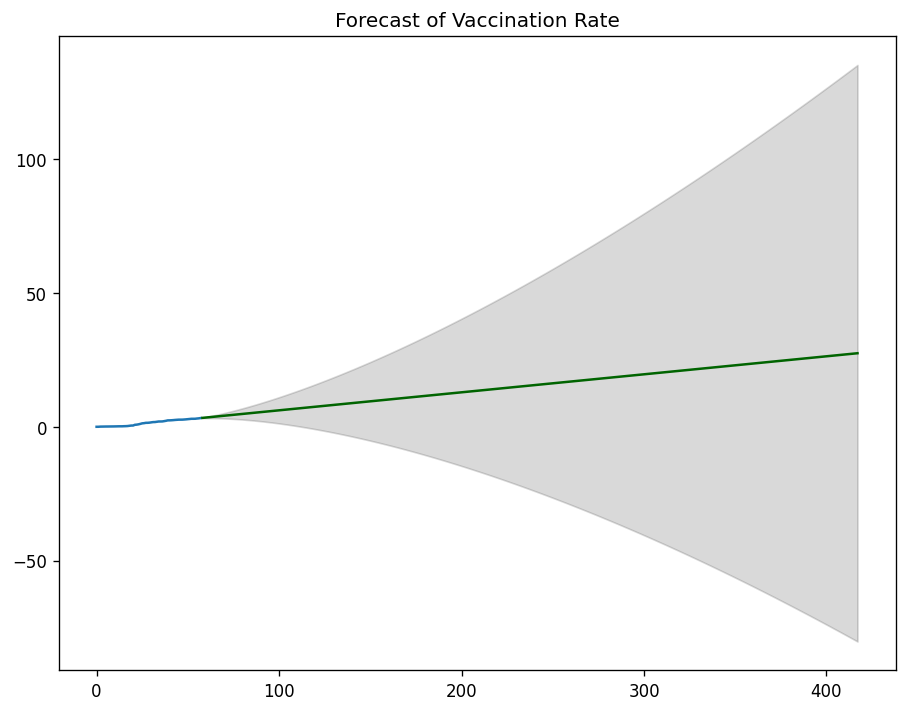

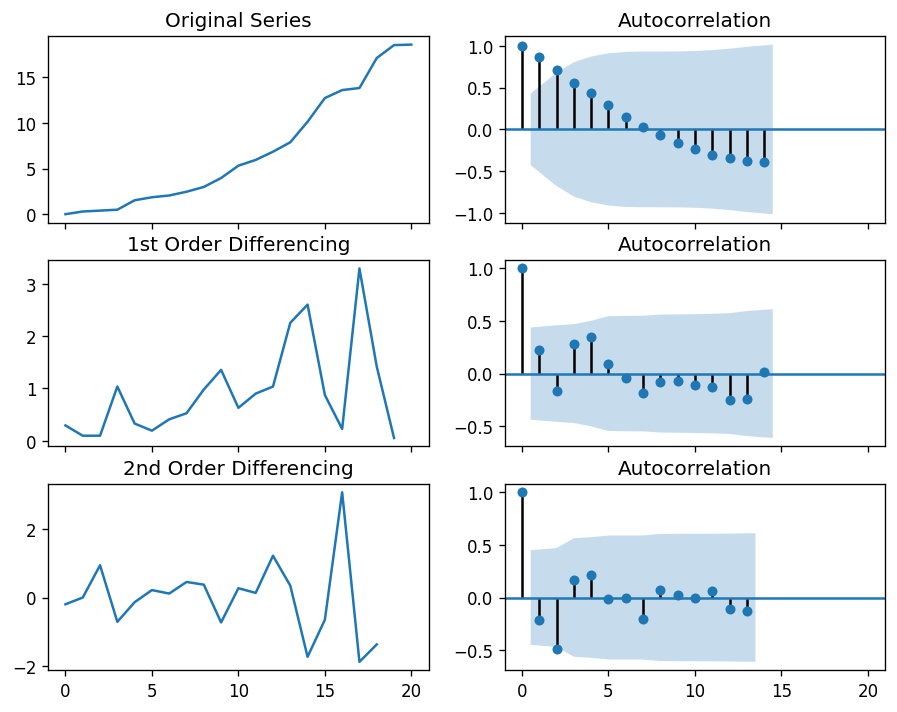

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=60.871, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=61.915, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=58.874, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.501 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -28.437
Date:                Fri, 11 Jun 2021   AIC                             58.874
Time:                        13:17:29   BIC                             59.818
Sample:                             0   HQIC                            59.034
                                 - 21                                         
Covariance Ty

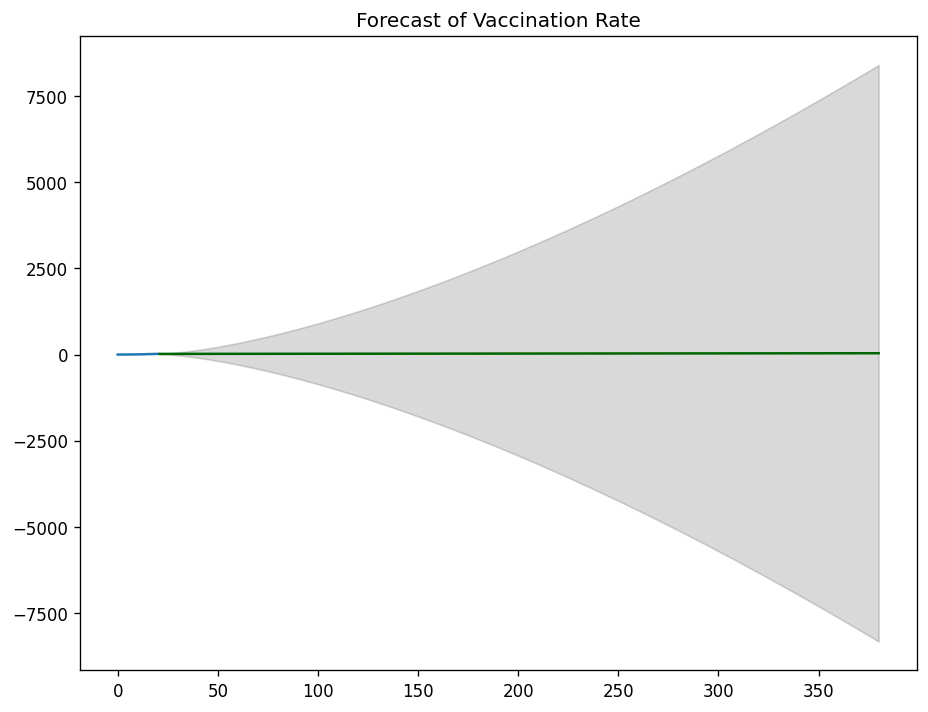

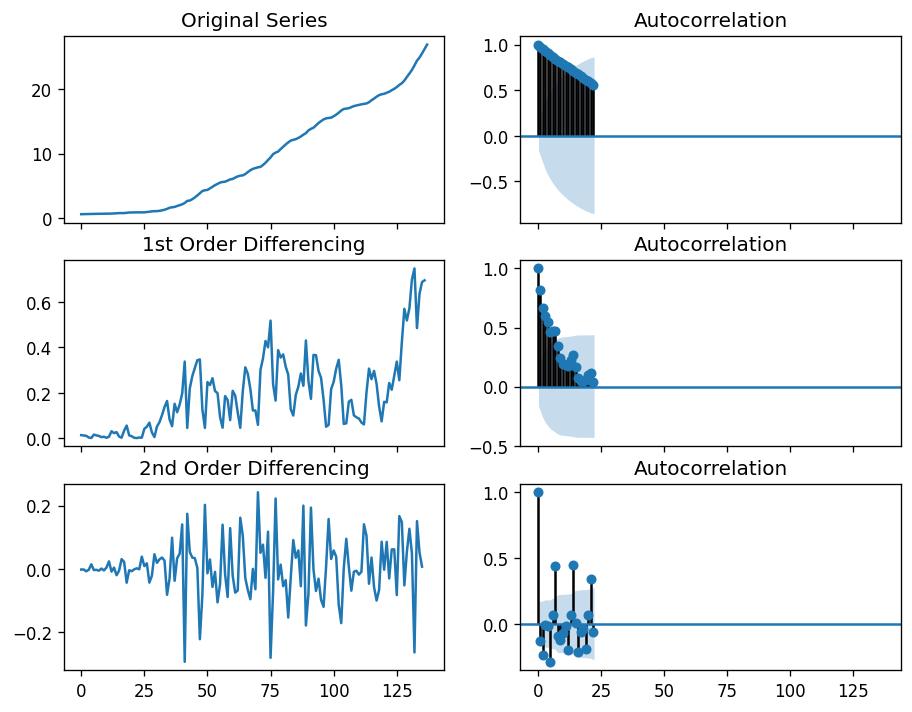

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-270.531, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-260.258, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-260.377, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-262.585, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-261.850, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-271.140, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-267.142, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-269.187, Time=0.44 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-269.293, Time=0.50 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-271.242, Time=0.42 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-272.614, Time=0.15 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-271.351, Time=0.32 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-270.227, Time=0.61 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-272.744, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]          

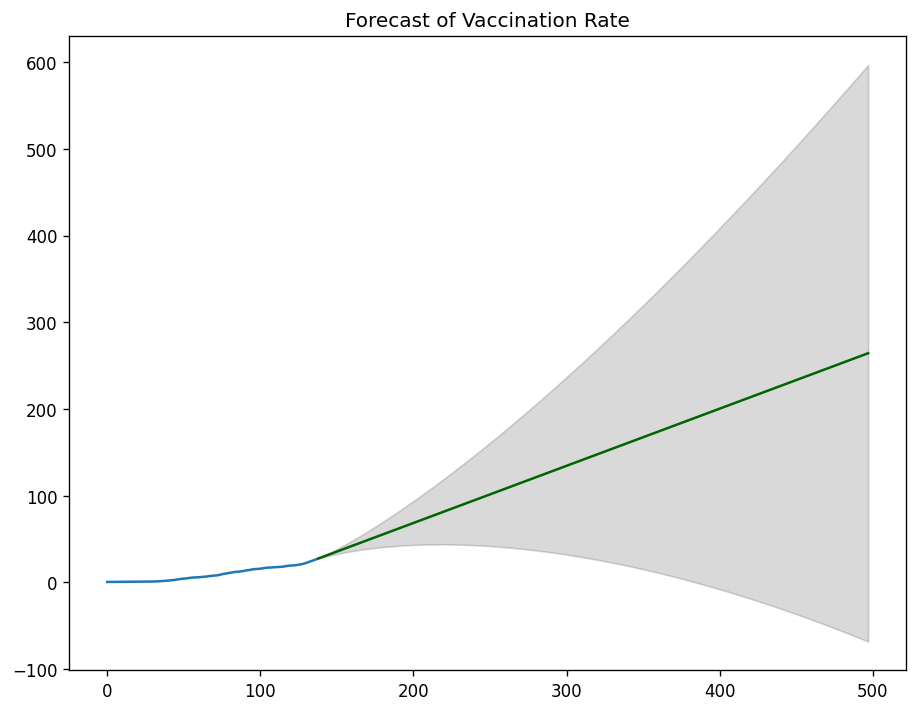

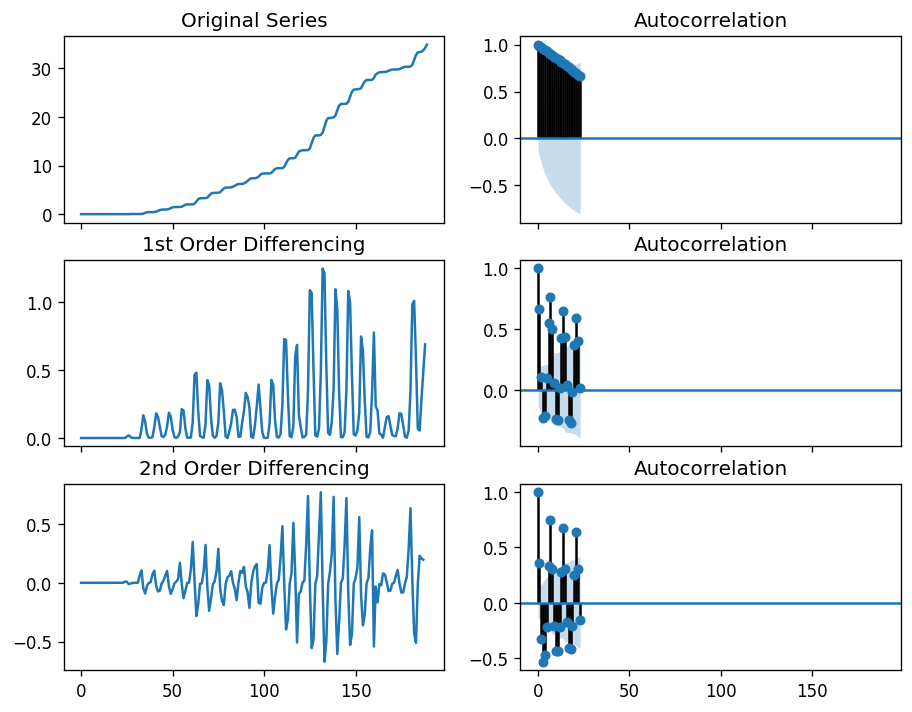

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-78.937, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-25.922, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-50.292, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-80.604, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-27.871, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-82.573, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-80.904, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-116.181, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-133.863, Time=0.25 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-205.480, Time=0.30 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-183.521, Time=0.13 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-205.734, Tim

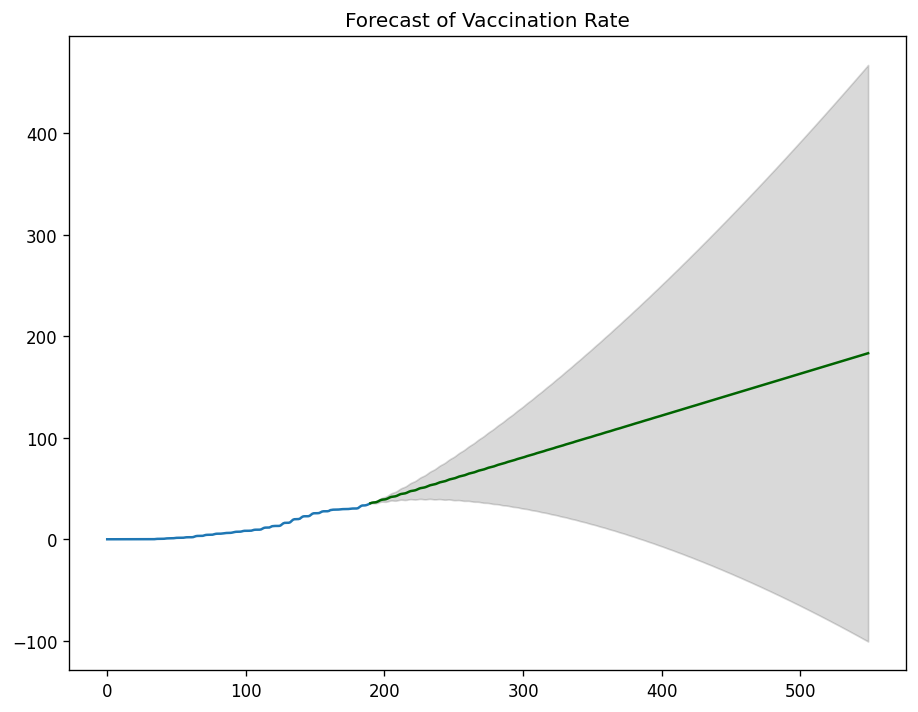

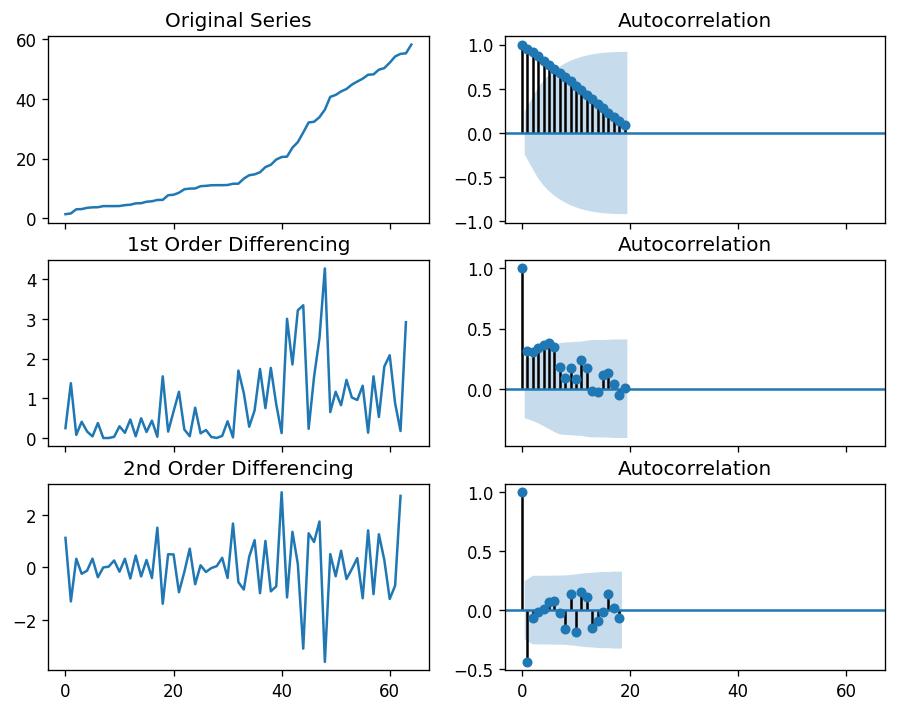

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=167.116, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=194.877, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=181.695, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=165.190, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=192.970, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=168.006, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=163.889, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=165.689, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=165.581, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=179.768, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.247 seconds
                               SARIMAX Results                                
Dep. Variable:               

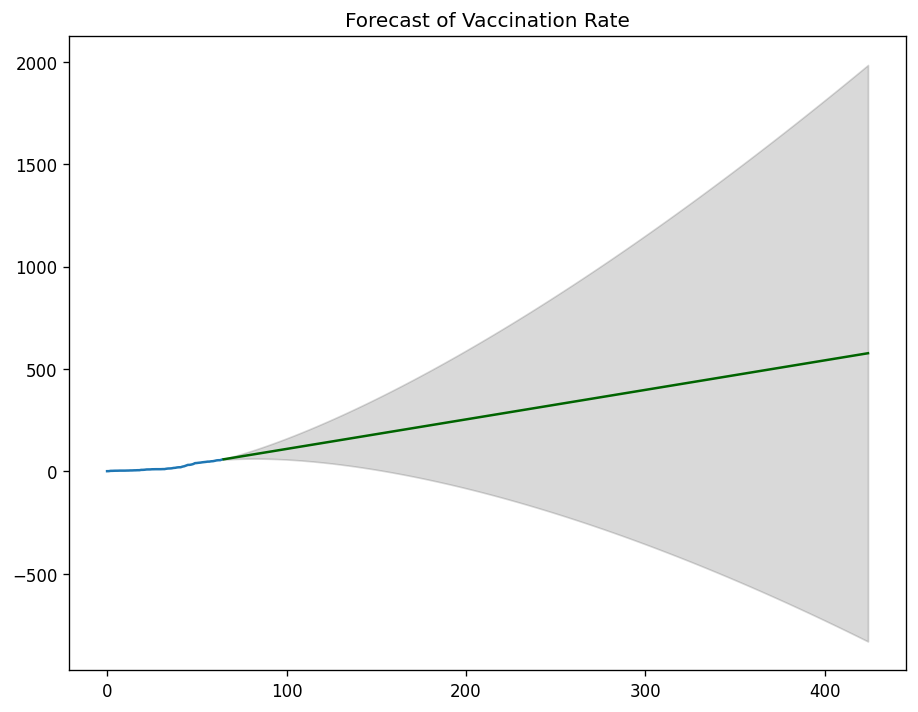

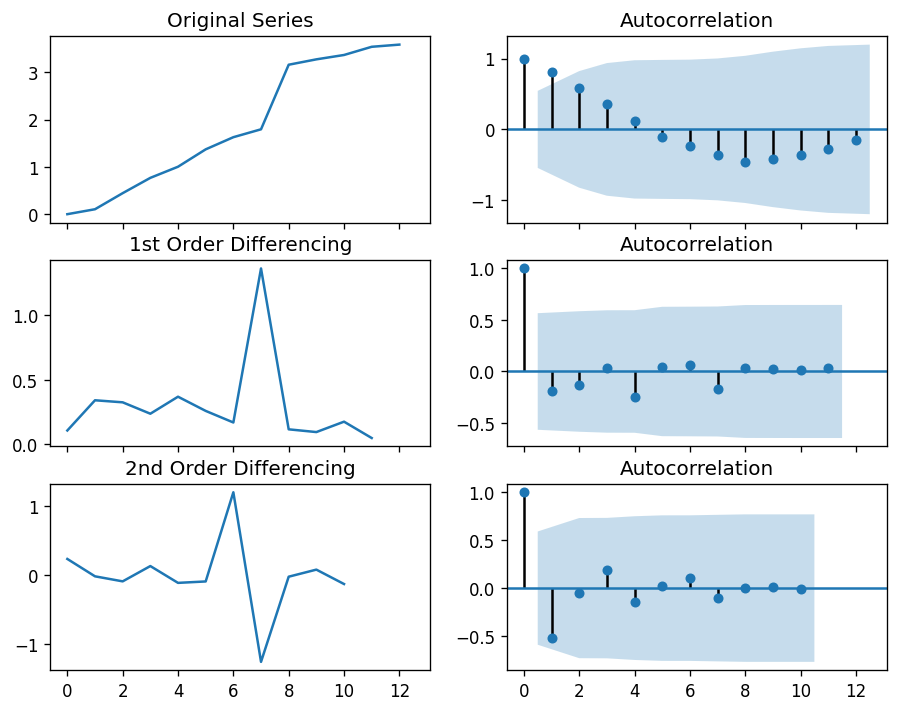

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=21.369, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=20.165, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=19.370, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.436 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  -8.685
Date:                Fri, 11 Jun 2021   AIC                             19.370
Time:                        13:17:55   BIC                             19.768
Sample:                             0   HQIC                            19.119
                                 - 13                                         
Covariance Ty

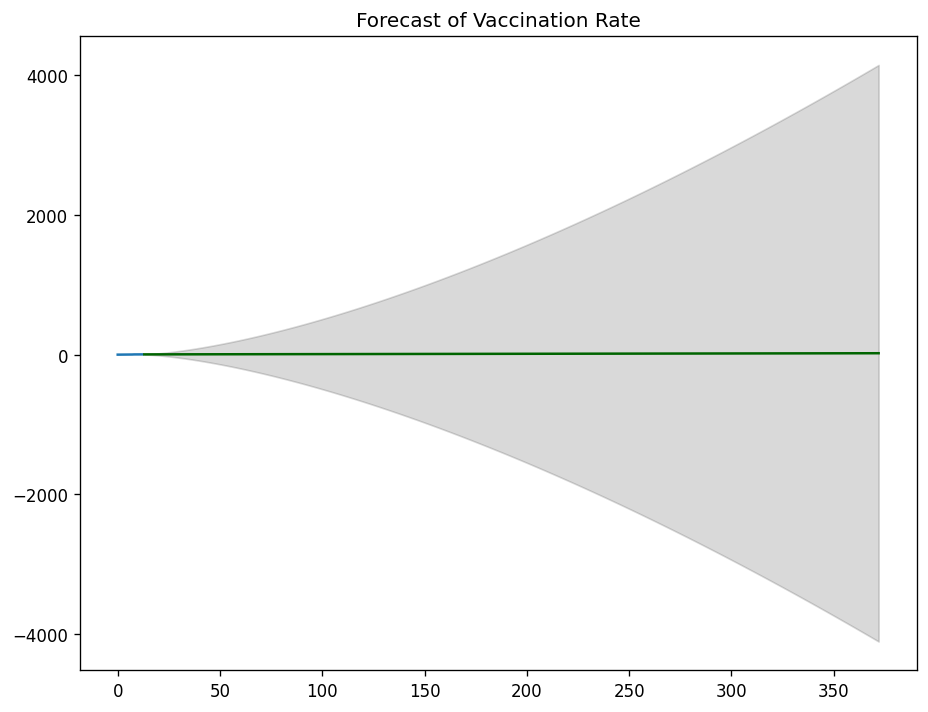

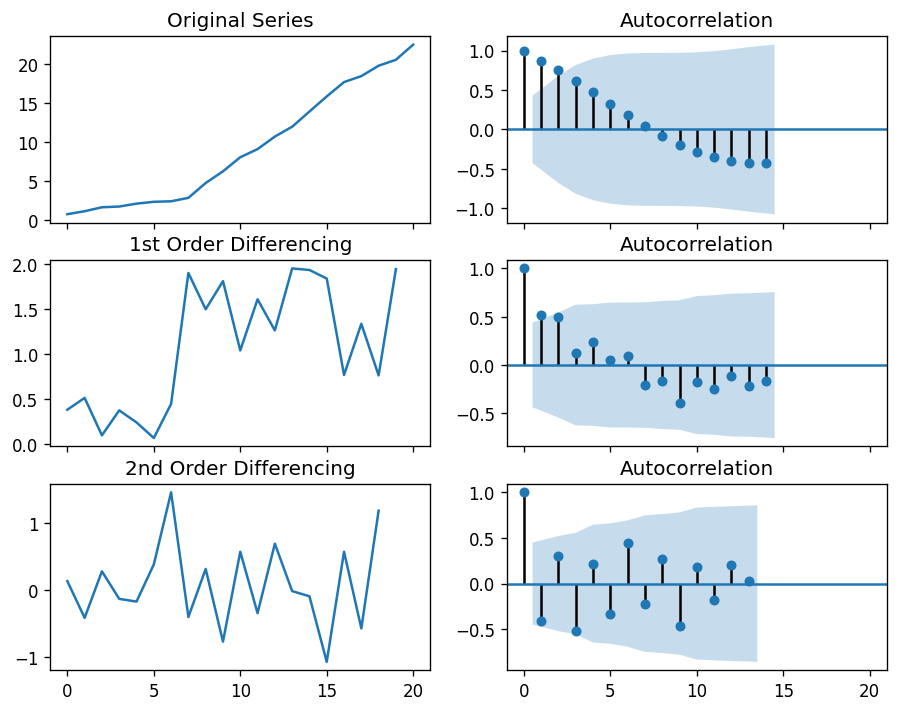

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=35.396, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=40.139, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=38.000, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=38.301, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=38.465, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=37.374, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=37.355, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=39.274, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=33.742, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=37.207, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=36.489, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=35.704, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=35.677, Time=0.15 sec
 AR

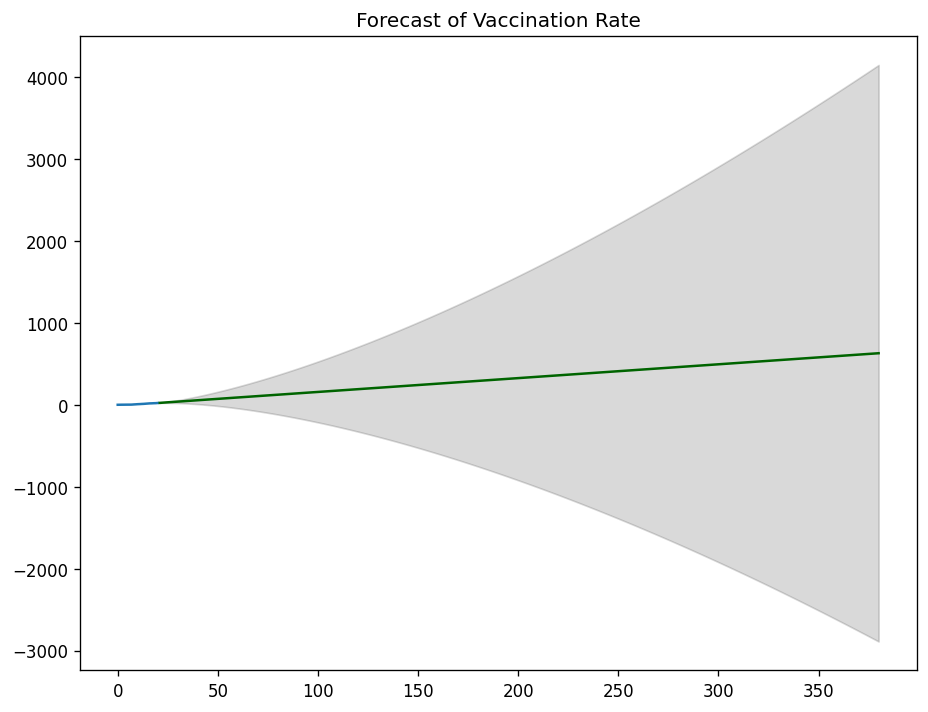

In [35]:
import math
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
country_list = ['CAN', 'AUS', 'GBR', 'USA', 'BRA', 'DEU', 'DNK', 'ZAF', 'RUS', 'GTM',
                'NGA', 'ESP', 'IRN', 'ETH', 'IDN', 'EGY', 'MEX', 'COL', 'CHE', 'LKA', 'TUR', 'NAM',
                'JOR', 'ARG', 'NOR', 'ISL', 'UZB', 'PYF']


#create one big dataframe within the for loop
big_data= pd.DataFrame()       
                       
for country in country_list:
  pcv = pcv.sort_values('location')
  pcv['eid'] = (pcv.groupby(['location']).cumcount()==0).astype(int)
  pcv['eid'] = pcv['eid'].cumsum()
  pcvdf=pcv[pcv.iso_code==country]

  #check dataframe of country
  #Train & Test data

  fpcvdf = pcvdf.sort_values('people_vaccinated')
  pcvval = fpcvdf['people_vaccinated'].values * 100 /list(pcvdf.population)[0]

  for i in range(len(pcvval)):
    if pcvval[i]>=0:
      pass
    else :
      end = i
      break

  pcvval = pcvval[:end]
  d = list(fpcvdf.date)[:end]
  fig, axes = plt.subplots(3, 2, sharex=True)
  axes[0, 0].plot(pcvval); axes[0, 0].set_title('Original Series')
  plot_acf(pcvval, ax=axes[0, 1])

  # 1st Differencing
  axes[1, 0].plot(np.diff(pcvval)); axes[1, 0].set_title('1st Order Differencing')
  plot_acf(np.diff(pcvval), ax=axes[1, 1])
  dpcvval = np.diff(pcvval)

  # 2nd Differencing
  axes[2, 0].plot(np.diff(dpcvval)); axes[2, 0].set_title('2nd Order Differencing')
  plot_acf(np.diff(dpcvval), ax=axes[2, 1])
  plt.show()

  #arima model parameters
  model = pm.auto_arima(pcvval, start_p=1, start_q=1,
  test='adf', # use adftest to find optimal 'd'
  max_p=8, max_q=8, # maximum p and q
  m=1, # frequency of series
  d=None, # let model determine 'd'
  seasonal=False, # No Seasonality
  start_P=0,
  D=0,
  trace=True,
  error_action='ignore',
  suppress_warnings=True,
  stepwise=True)
  print(model.summary())
  # model.plot_diagnostics(figsize=(7,5))
  plt.show()
  n_periods = 12*30
  fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
  index_of_fc = np.arange(len(pcvval), len(pcvval)+n_periods)

  # make series for plotting purpose
  fc_series = pd.Series(fc, index=index_of_fc)
  lower_series = pd.Series(confint[:, 0], index=index_of_fc)
  upper_series = pd.Series(confint[:, 1], index=index_of_fc)
  # Plot
  plt.plot(pcvval)
  plt.plot(fc_series, color='darkgreen')
  plt.fill_between(lower_series.index,
  lower_series,
  upper_series,
  color='k', alpha=.15)
  plt.title("Forecast of Vaccination Rate")
  plt.show()

  for i in range(n_periods):
    date = parse(d[-1]) + datetime.timedelta(days=1)
    d.append(str(date).split()[0])

  #calculates the lag
  vaccinated = (fpcvdf.dropna(subset=["people_vaccinated"])["people_vaccinated"]*100/list(pcvdf.population)[0]).tolist()
  fully_vaccinated = (fpcvdf.dropna(subset=["people_vaccinated"])["people_fully_vaccinated"]*100/list(pcvdf.population)[0]).tolist()
  mseMin = math.inf
  lagMin=0

  for lag in range(0,139):
    vacNew = vaccinated[:len(vaccinated)-lag]
    fullVacNew = fully_vaccinated[lag:]
    mse = 0
    if len(fullVacNew)> 0:
      for i in range(len(fullVacNew)):
        mse += (vacNew[i] - fullVacNew[i])**2
        mse = mse/len(vacNew)
      if mse < mseMin:
        lagMin = lag
        mseMin = mse
    else:
      pass
 
  y = list(pcvval) + list(fc)

  dfp = pd.DataFrame()
  dfp['date'] = d
  dfp["date"] = pd.to_datetime(dfp["date"]) #convert string into datetime object
  dfp["date_adjusted"] =  dfp["date"] + datetime.timedelta(days=lagMin) #add lag factor
  dfp['people_fully_vaccinated'] = y
  dfp['location']= country
  big_data= pd.concat([big_data, dfp], axis=0, sort=False, ignore_index=True)

big_data.to_csv(f'world_data_forecast.csv', index= False)

  

In [36]:
df= pd.read_csv('/content/world_data_forecast.csv')
df

date date_adjusted  people_fully_vaccinated location
0      2021-01-06    2021-03-25                 0.484683      CAN
1      2021-01-07    2021-03-26                 0.578555      CAN
2      2021-01-08    2021-03-27                 0.685247      CAN
3      2021-01-09    2021-03-28                 0.777118      CAN
4      2021-01-10    2021-03-29                 0.839011      CAN
...           ...           ...                      ...      ...
12702  2022-05-30    2022-06-02               623.145689      PYF
12703  2022-05-31    2022-06-03               624.826752      PYF
12704  2022-06-01    2022-06-04               626.520733      PYF
12705  2022-06-02    2022-06-05               628.201929      PYF
12706  2022-06-03    2022-06-06               629.895780      PYF

[12707 rows x 4 columns]

In [37]:
cols= ['date_adjusted', 'people_fully_vaccinated', 'location']
preddf= df[cols]
preddf.head()

date_adjusted  people_fully_vaccinated location
0    2021-03-25                 0.484683      CAN
1    2021-03-26                 0.578555      CAN
2    2021-03-27                 0.685247      CAN
3    2021-03-28                 0.777118      CAN
4    2021-03-29                 0.839011      CAN

In [38]:
preddf_id= preddf.set_index('date_adjusted')
preddf_id.head()

people_fully_vaccinated location
date_adjusted                                  
2021-03-25                    0.484683      CAN
2021-03-26                    0.578555      CAN
2021-03-27                    0.685247      CAN
2021-03-28                    0.777118      CAN
2021-03-29                    0.839011      CAN

In [39]:
filt1= preddf_id['people_fully_vaccinated'] >=70
filt2=preddf_id['location']== 'CAN'
filtCAN=filt1 & filt2
preddf_id [filt].head()

people_fully_vaccinated location
date_adjusted                                  
2021-09-11                   70.498836      CAN
2021-09-12                   70.943662      CAN
2021-09-13                   71.415524      CAN
2021-09-14                   71.935451      CAN
2021-09-15                   72.310681      CAN

In [40]:
filt3= preddf_id['people_fully_vaccinated'] >=70
filt4=preddf_id['location']== 'AUS'
filtAUS=filt3 & filt4
preddf_id [filtaus].head()

people_fully_vaccinated location
date_adjusted                                  
2021-10-29                   70.134911      AUS
2021-10-30                   70.587911      AUS
2021-10-31                   71.040910      AUS
2021-11-01                   71.493910      AUS
2021-11-02                   71.946910      AUS

In [41]:
filt5= preddf_id['people_fully_vaccinated'] >=70
filt6=preddf_id['location']== 'GBR'
filtGBR=filt5 & filt6
preddf_id [filtgbr].head()

people_fully_vaccinated location
date_adjusted                                  
2021-10-02                   70.111830      GBR
2021-10-03                   70.371912      GBR
2021-10-04                   70.631994      GBR
2021-10-05                   70.892075      GBR
2021-10-06                   71.152157      GBR

In [42]:
filt7= preddf_id['people_fully_vaccinated'] >=70
filt8=preddf_id['location']== 'USA'
filtUSA=filt7 & filt8
preddf_id [filtusa].head()

people_fully_vaccinated location
date_adjusted                                  
2021-11-23                   70.069491      USA
2021-11-24                   70.215709      USA
2021-11-25                   70.361927      USA
2021-11-26                   70.508145      USA
2021-11-27                   70.654363      USA